# Project 6: Visualizing Monetary Policy

In this lecture, we will review the [Federal Reserve's balance sheet](https://fred.stlouisfed.org/release/tables?rid=20&eid=1194154&od=#) and review Fed activity in the overnight lending market, creating functions for visualizing relevant data in the process. We will  create a *plots.py* file class that will include some of the visualization functions from chapters 5 and 6, as well as some new visualizations that we will create in this lesson.

Let's get started by reconstructing the scatter plot function from  chapter 6. For this project, we will represent the time period with color. Make sure to save plot functions and functions to download data from FRED in separate files using *Spyder*. Save them in a folder named *datlib*. This folder must be in the same directory as this notebook. We will import that folder (package). The name of the appropriate file is included in the first line of each file.

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(1948,1,1)
end = datetime.datetime.today()
df = web.DataReader("GDPC1", "fred", start, end).resample("Q").mean()
df

,GDPC1
DATE,
1948-03-31,2087.442
1948-06-30,2121.899
1948-09-30,2134.056
1948-12-31,2136.440
1949-03-31,2107.001
...,...
2021-12-31,20006.181
2022-03-31,19924.088
2022-06-30,19895.271


<AxesSubplot:xlabel='DATE'>

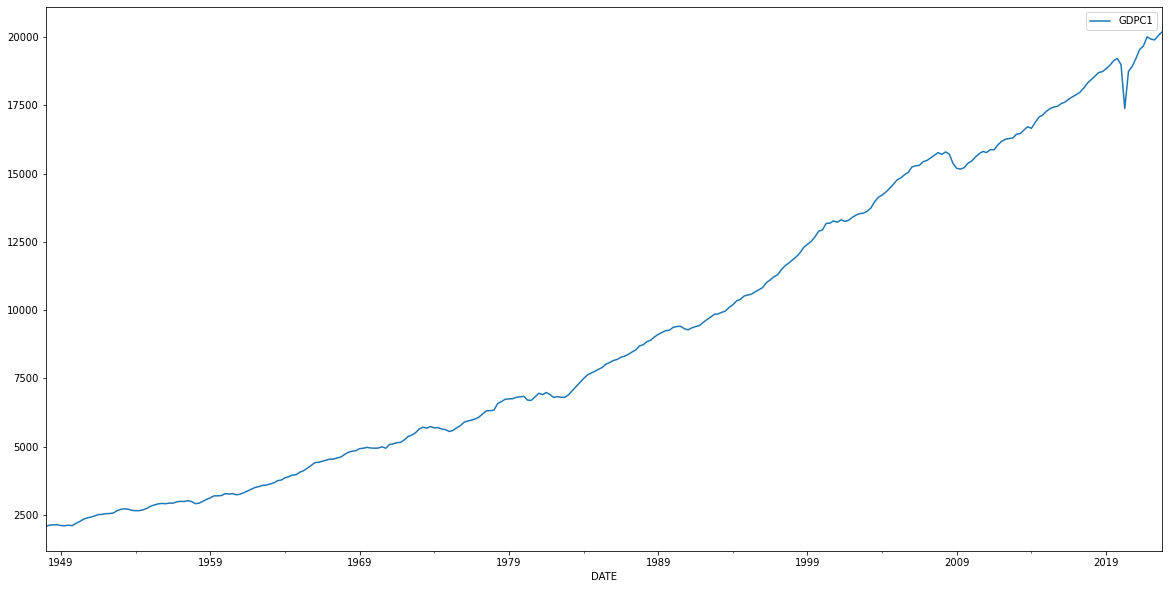

In [2]:
df.plot.line(figsize = (20,10))

In [3]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
            code, "fred", start, end).resample(freq).mean() # .first() or .last() or median . . .
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [4]:
data_codes = {"Base: Total": "BOGMBASEW",
             "Base: Currency in Circulation": "WCURCIR"}
start = datetime.datetime(2002,1,1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

In [5]:
data["Base: Currency in Circulation"] = data["Base: Currency in Circulation"].mul(1000)

In [6]:
data.iloc[-10:]

,Base: Total,Base: Currency in Circulation
DATE,,
2020-07-12,4772522.0,1974690.0
2020-07-19,4772522.0,1978510.0
2020-07-26,4609143.0,1982873.0
2020-08-02,4609143.0,1988190.0
2020-08-09,4750981.0,1996626.0
2020-08-16,4750981.0,2003019.0
2020-08-23,4830999.0,2007458.0
2020-08-30,4830999.0,2010991.0
2020-09-06,4876690.0,2016895.0


<AxesSubplot:xlabel='DATE'>

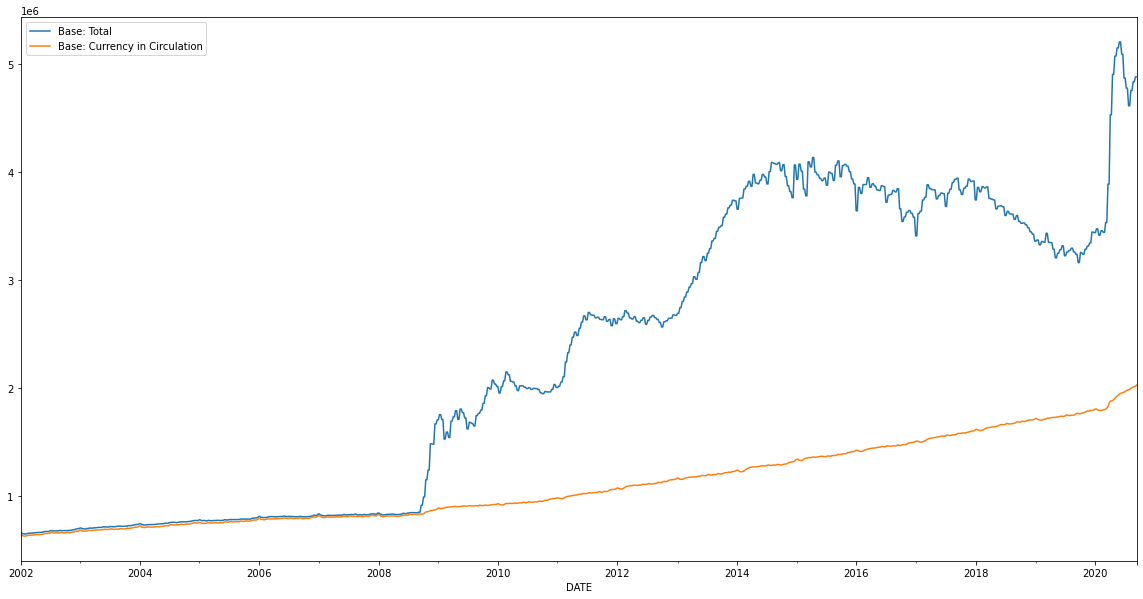

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
data.plot.line(ax = ax)

Text(0.5, 1.0, 'Currency in Circulation')

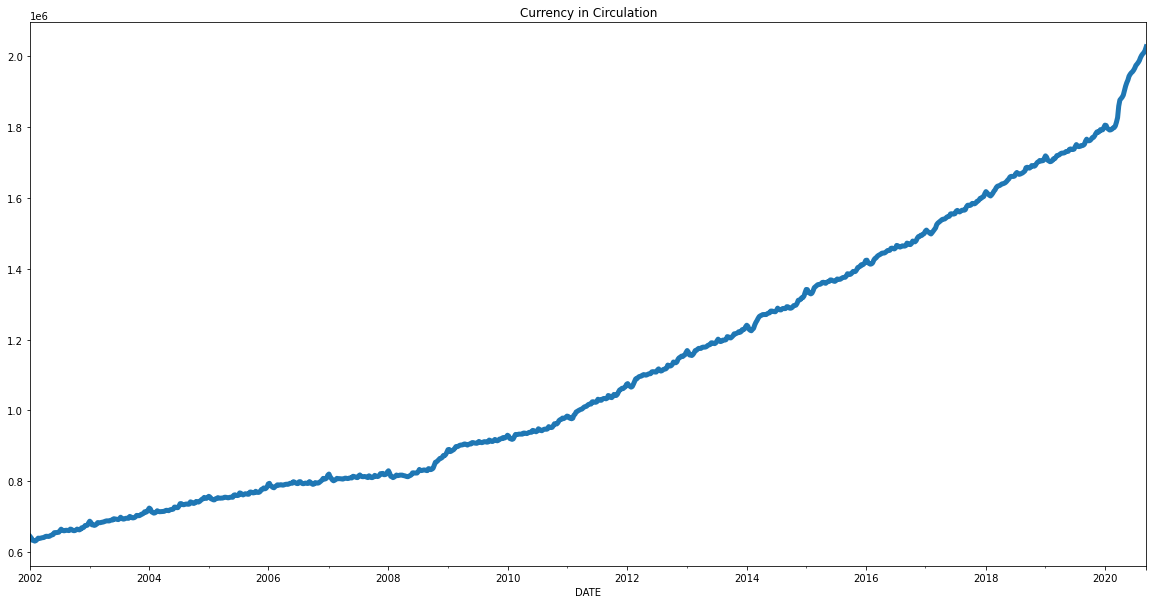

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
data["Base: Currency in Circulation"].plot.line(linewidth = 5, ax = ax)
ax.set_title("Currency in Circulation")

In [9]:
data_codes  = {"Base: Total ($ Mil)": "BOGMBASE",
               "Base: Currency in Circulation ($ Mil)": "WCURCIR",
               # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
               ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
               # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",
               # unamortized value of securities held (due to changes in interest rates)
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",
               # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
               ### Major share of deposits 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
               "Interest on Reserve Balances":"IORB",

               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq= "M")

In [10]:
# save data as csv
data.to_csv("MonetaryData.csv")

## Merge two data sets, interest on reserves at Fed, with one overlapping date

<AxesSubplot:xlabel='DATE'>

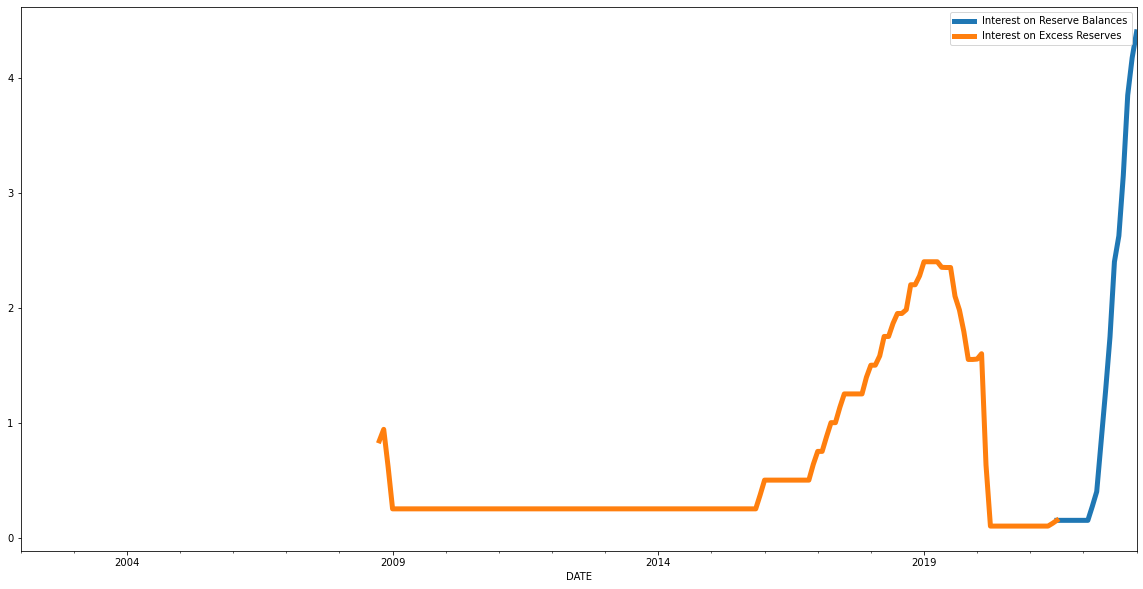

In [11]:
plot_data = data[["Interest on Reserve Balances","Interest on Excess Reserves"]]
fig, ax = plt.subplots(figsize = (20,10))
plot_data.plot.line(ax = ax, linewidth = 5)

In [12]:
match = plot_data[plot_data["Interest on Reserve Balances"] == plot_data["Interest on Excess Reserves"]]
match

,Interest on Reserve Balances,Interest on Excess Reserves
DATE,,
2021-07-31,0.15,0.15


In [13]:
match_date = match.index
match_val = match.sum(axis = 1)/2
match_date, match_val

(DatetimeIndex(['2021-07-31'], dtype='datetime64[ns]', name='DATE', freq='M'),
 DATE
 2021-07-31    0.15
 Freq: M, dtype: float64)

In [14]:
# sum the interest rate data sets
plot_data = plot_data.fillna(0)
plot_data = plot_data.sum(axis = 1)


<AxesSubplot:xlabel='DATE'>

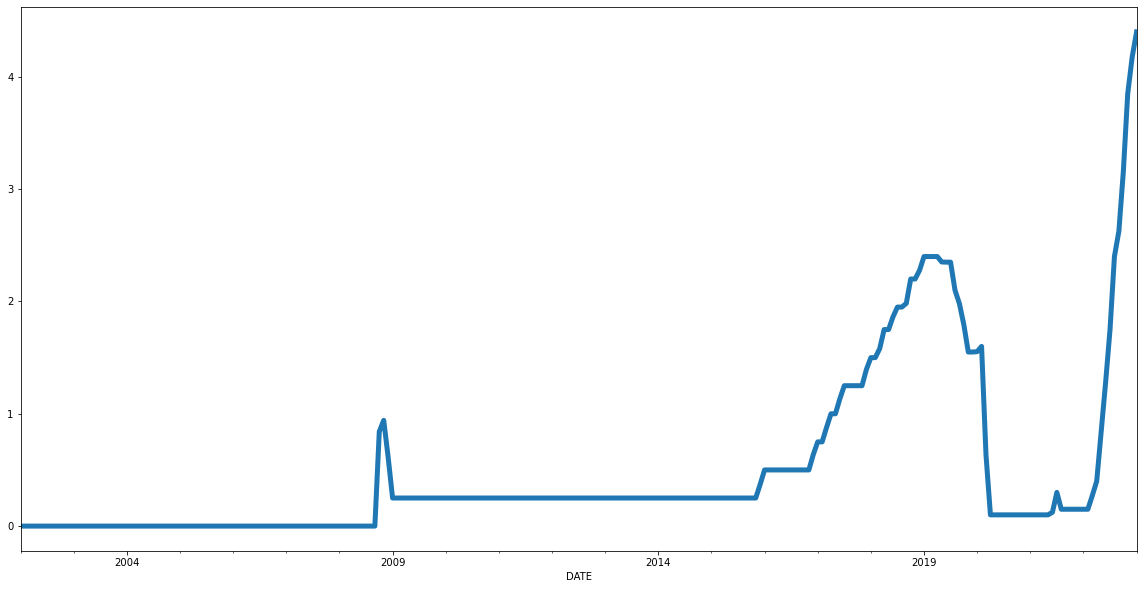

In [15]:
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)
#data["Interest on Reserves"] = data["Interest on Excess Reserves"].fillna(0).add(
#    data["Interest on Reserves"])

<AxesSubplot:xlabel='DATE'>

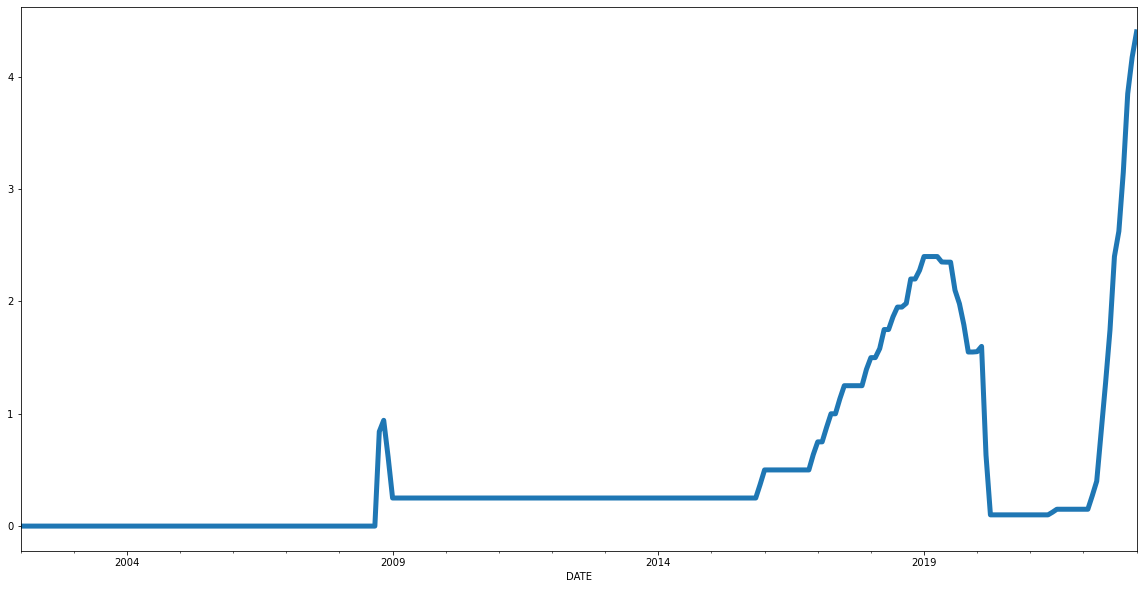

In [16]:
plot_data.loc[match_date] = match_val
fig, ax = plt.subplots(figsize = (20,10))

plot_data.plot.line(linewidth = 5, ax = ax)

In [17]:
plot_data

DATE
2002-01-31    0.000000
2002-02-28    0.000000
2002-03-31    0.000000
2002-04-30    0.000000
2002-05-31    0.000000
                ...   
2022-09-30    2.625000
2022-10-31    3.150000
2022-11-30    3.850000
2022-12-31    4.174194
2023-01-31    4.400000
Freq: M, Length: 253, dtype: float64

<AxesSubplot:xlabel='DATE'>

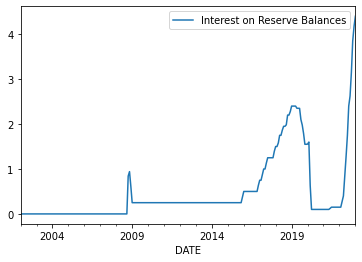

In [18]:
data["Interest on Reserve Balances"] = plot_data
data[["Interest on Reserve Balances"]].plot()

## Build Function to Plot Lines of data in dataframe

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])
/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(y) + "%" for y in y_vals])


[Text(0, -1.0, '-1.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 1.0, '1.0%'),
 Text(0, 2.0, '2.0%'),
 Text(0, 3.0, '3.0%'),
 Text(0, 4.0, '4.0%'),
 Text(0, 5.0, '5.0%'),
 Text(0, 6.0, '6.0%')]

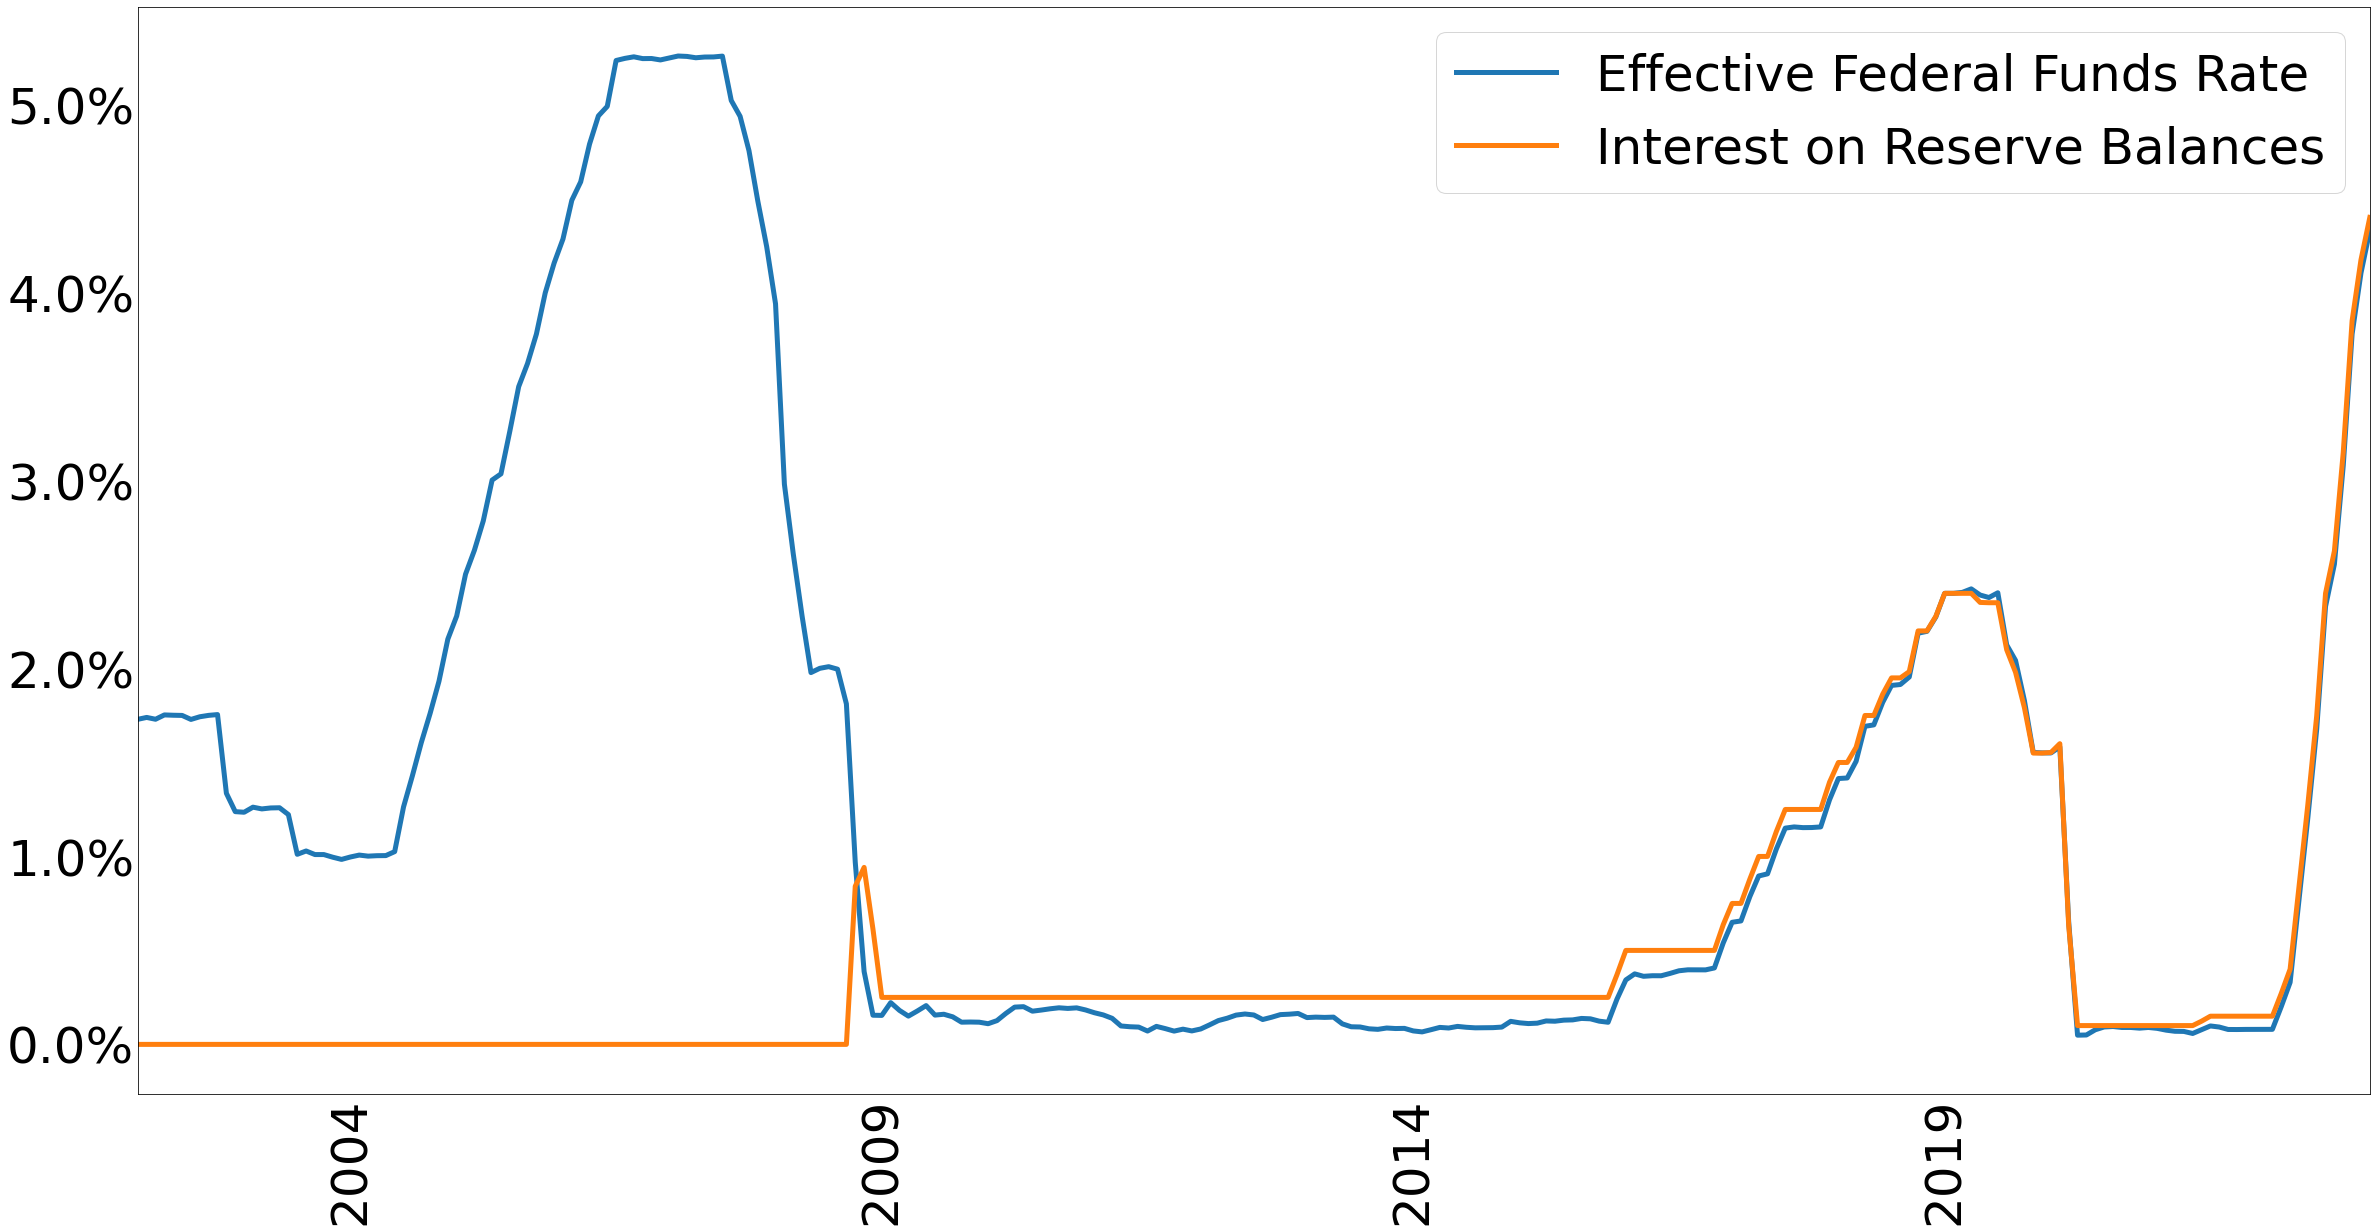

In [19]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
              global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    # remove label "DATE"
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = 'both')
    # round axis tick values
    # 1. access values
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    # save figure as file
    remove_chars = "[]:$'\\'"
    filename = str(list(df.keys()))
    # remove characters from filename
    for char in remove_chars:
        filename = filename.replace(char, "")
    if save_fig:
        folder = "Monetary Plots"
        try:
            os.mkdir(folder)
        except:
            pass
        plt.savefig(folder + "/" + filename[:50] + " line.png", bbox_inches = "tight")
    
    return fig, ax

plot_data = data[["Effective Federal Funds Rate",
                "Interest on Reserve Balances"]]

fig, ax = plot_lines(plot_data, save_fig = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([str(y) + "%" for y in y_vals])

## Monetary Base

In [20]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)",
                  "Balance Sheet: Other Deposits ($ Mil)",
                  "Base: Currency in Circulation ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = data[key].mul(10 ** 3)

In [21]:
money_vars = ["Base: Total ($ Mil)",
             "Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]
plot_data = data[money_vars]
plot_data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Excess Reserves ($ Mil)
DATE,,,
2002-01-31,653800.0,635429.00,1446.20
2002-02-28,654600.0,635884.00,1377.25
2002-03-31,659000.0,639697.50,1370.25
2002-04-30,663400.0,643579.50,1263.50
2002-05-31,668600.0,648293.20,1256.20
...,...,...,...
2022-09-30,5410900.0,2279946.25,NaN
2022-10-31,5339600.0,2283799.00,NaN
2022-11-30,5418700.0,2291416.00,NaN


/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


(<Figure size 2880x1440 with 1 Axes>, <AxesSubplot:>)

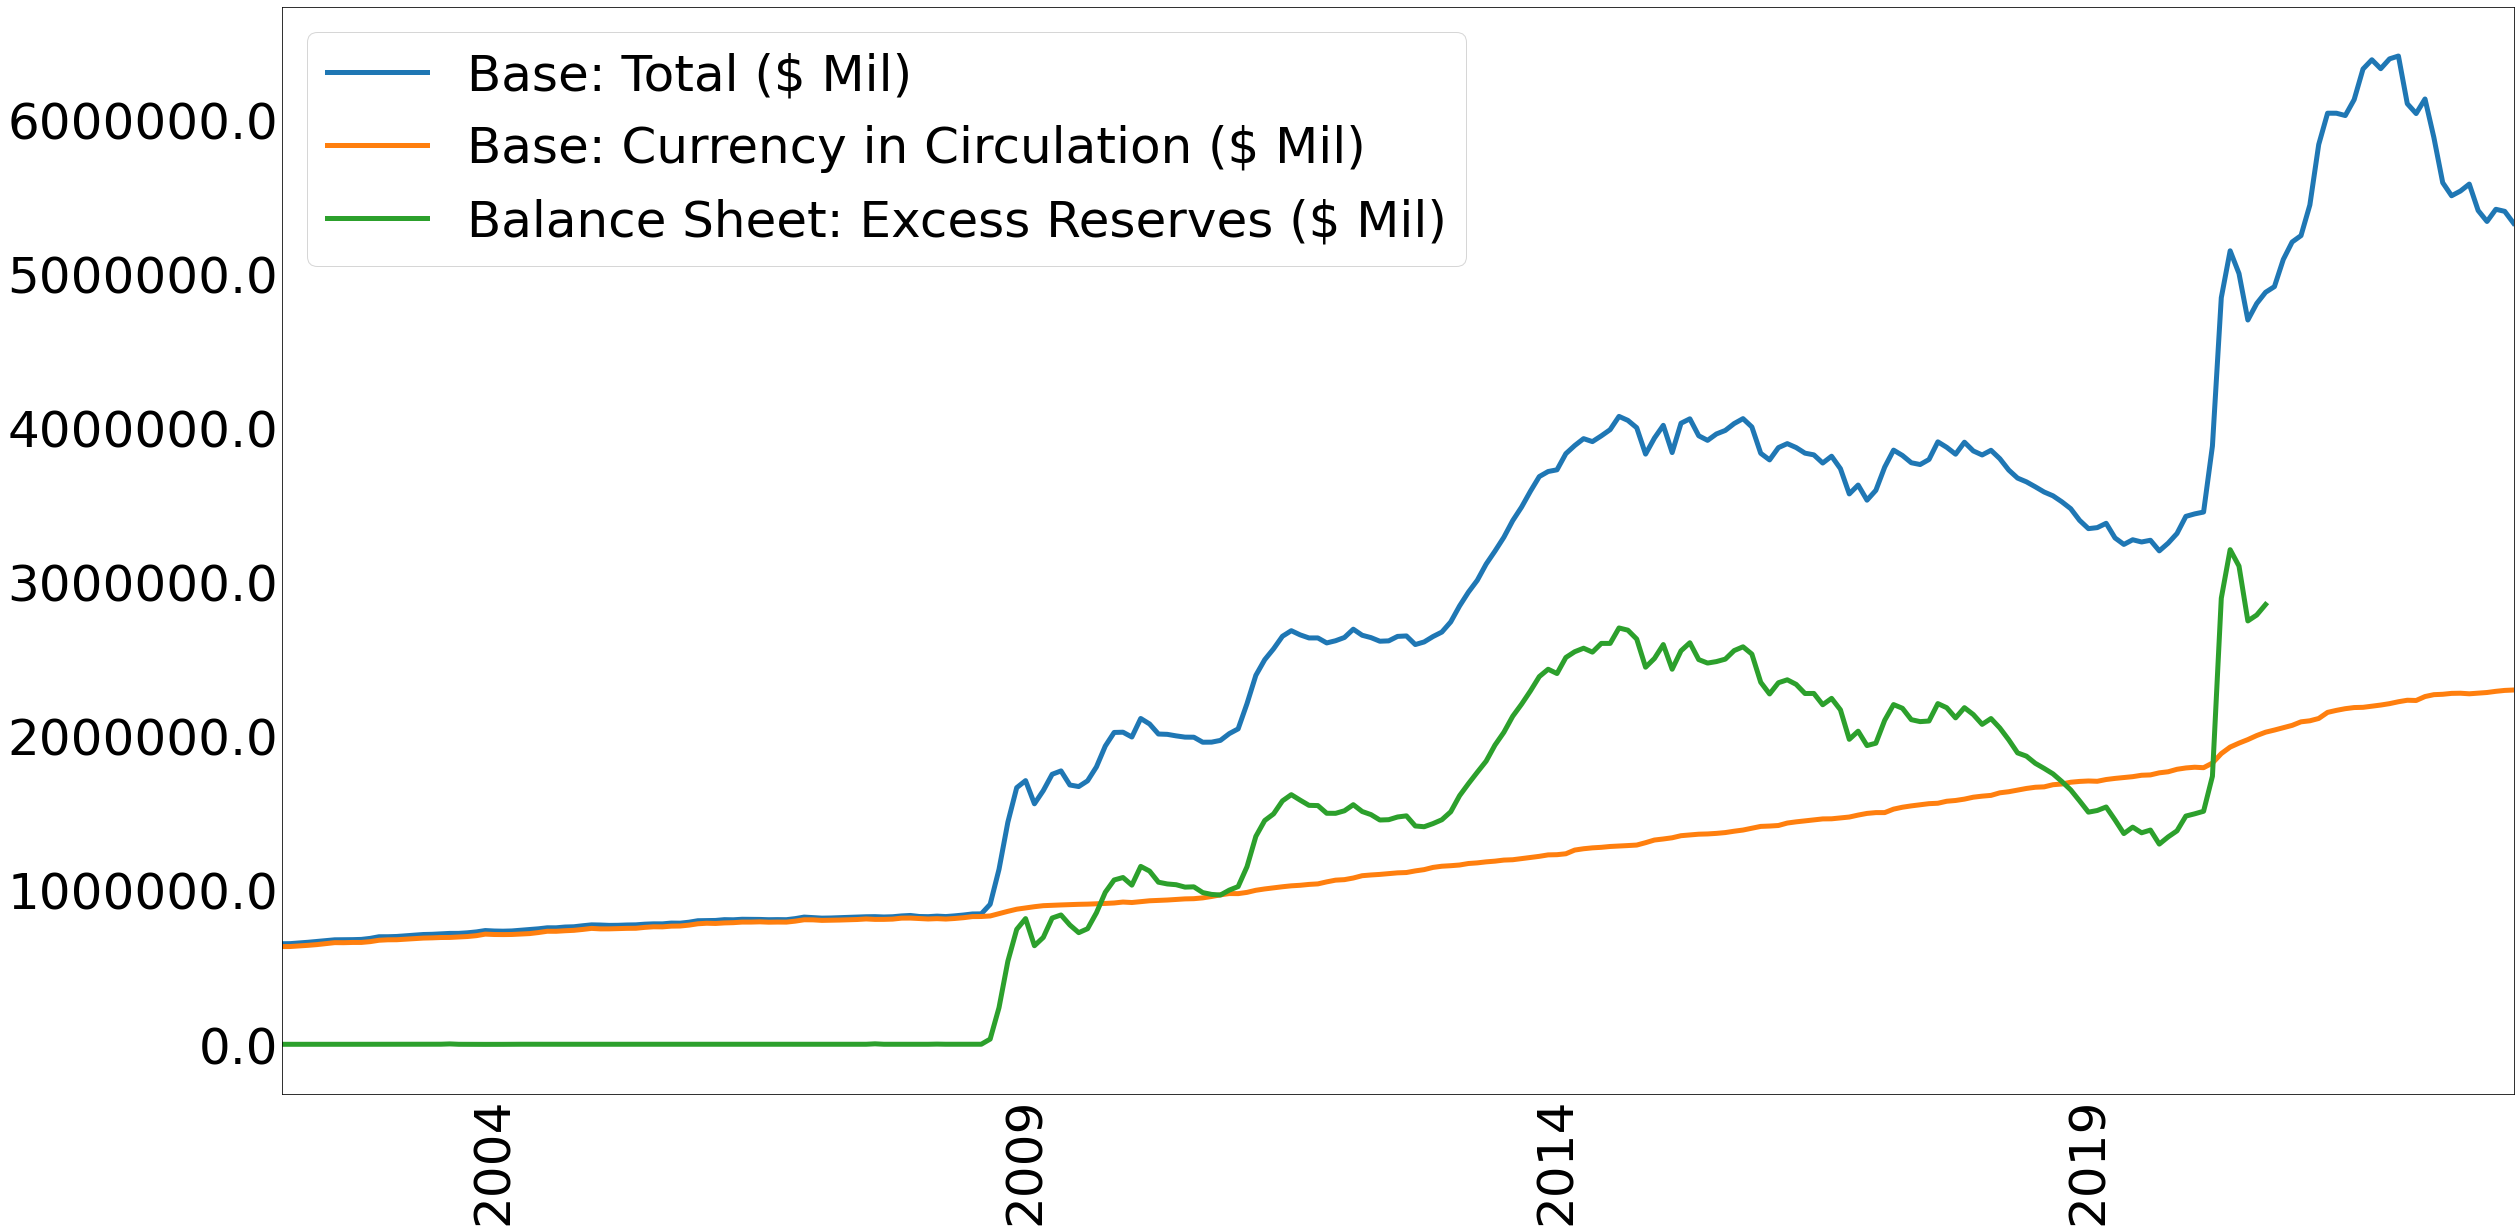

In [22]:
plot_lines(df = plot_data, linewidth = 5, figsize = (40,20), pp = None)

## Stacked Lines

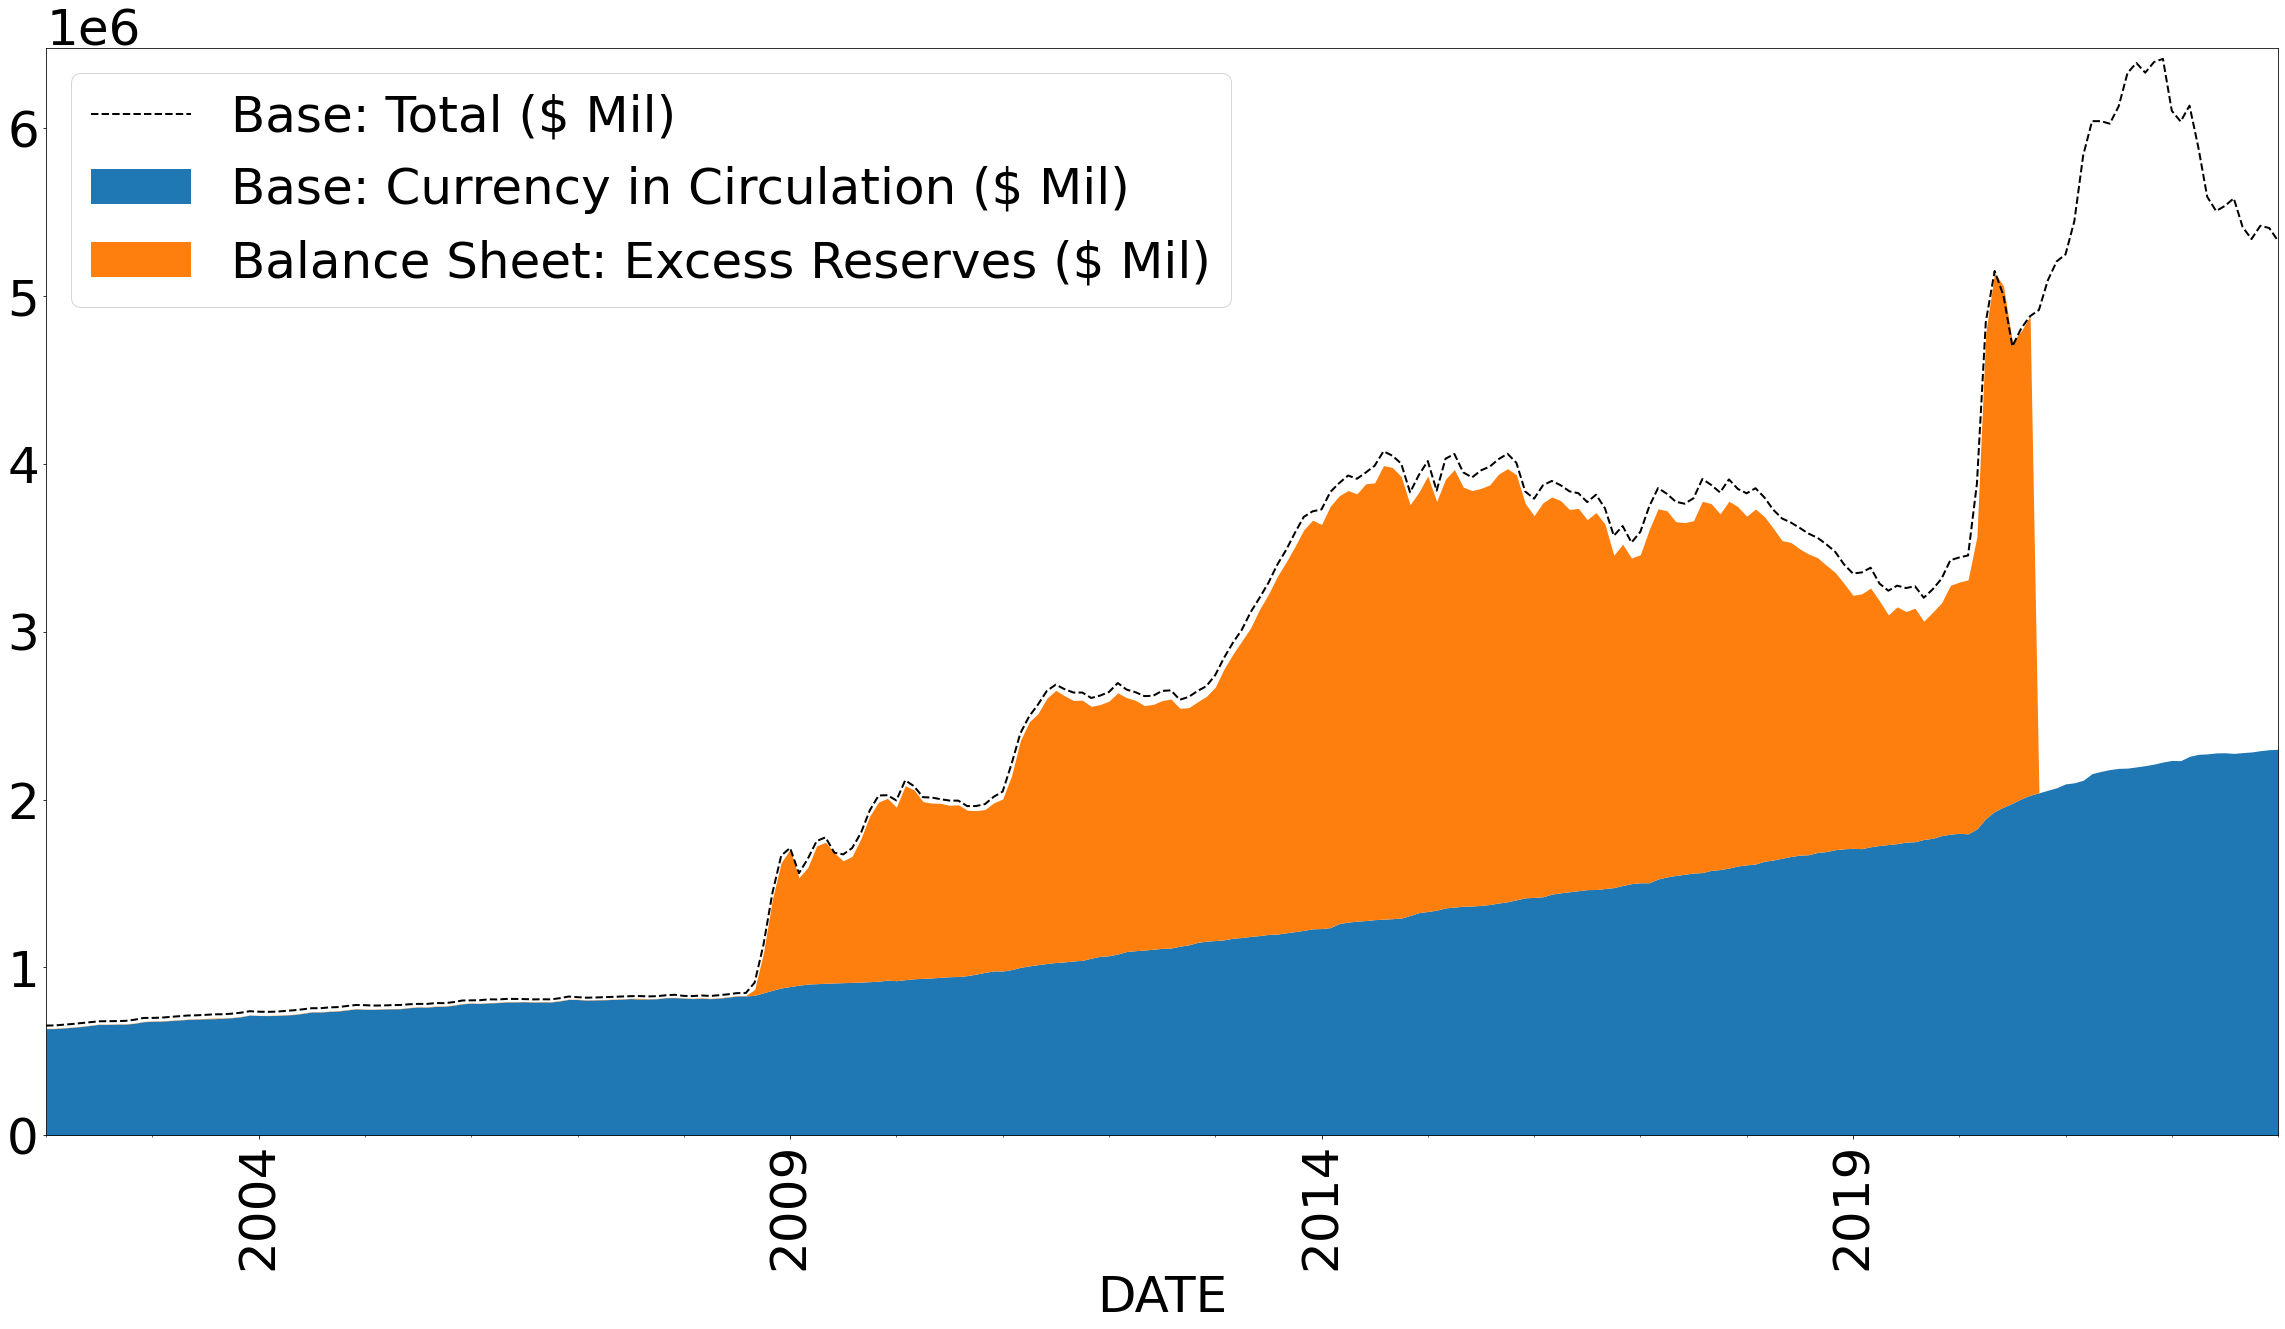

In [23]:
def plot_stacked(df,
                stack_vars,
                linewidth = 2,
                figsize = (40,20),
                total_var = False,
                global_fontsize = 50,
                ncol = 1):
    #reset gobal values for size of margin (white space)
    plt.rcParams['axes.ymargin'] = 0.01
    plt.rcParams['axes.xmargin'] = 0.00  
    # reset global values
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    
    if total_var != False:
        df[total_var].plot.line(
            linewidth = linewidth, 
            ax = ax, 
            c = "k",
            label = total_var, 
            ls = "--")
    
    area_df = df[stack_vars]
    area_df.plot.area(stacked = True,
                     linewidth = 0,
                     ax = ax)
        
    ax.legend(loc = 2, ncol = ncol)
    plt.xticks(rotation = 90)

    return fig, ax


stack_vars = money_vars[1:]
total_var = money_vars[0]
fig, ax = plot_stacked(df = data,
                      stack_vars = stack_vars,
                      total_var = total_var)

In [24]:
# money_vars.append("Balance Sheet: Required Reserves ($ Mil)")
money_vars = money_vars +["Balance Sheet: Required Reserves ($ Mil)"]
money_vars

['Base: Total ($ Mil)',
 'Base: Currency in Circulation ($ Mil)',
 'Balance Sheet: Excess Reserves ($ Mil)',
 'Balance Sheet: Required Reserves ($ Mil)']

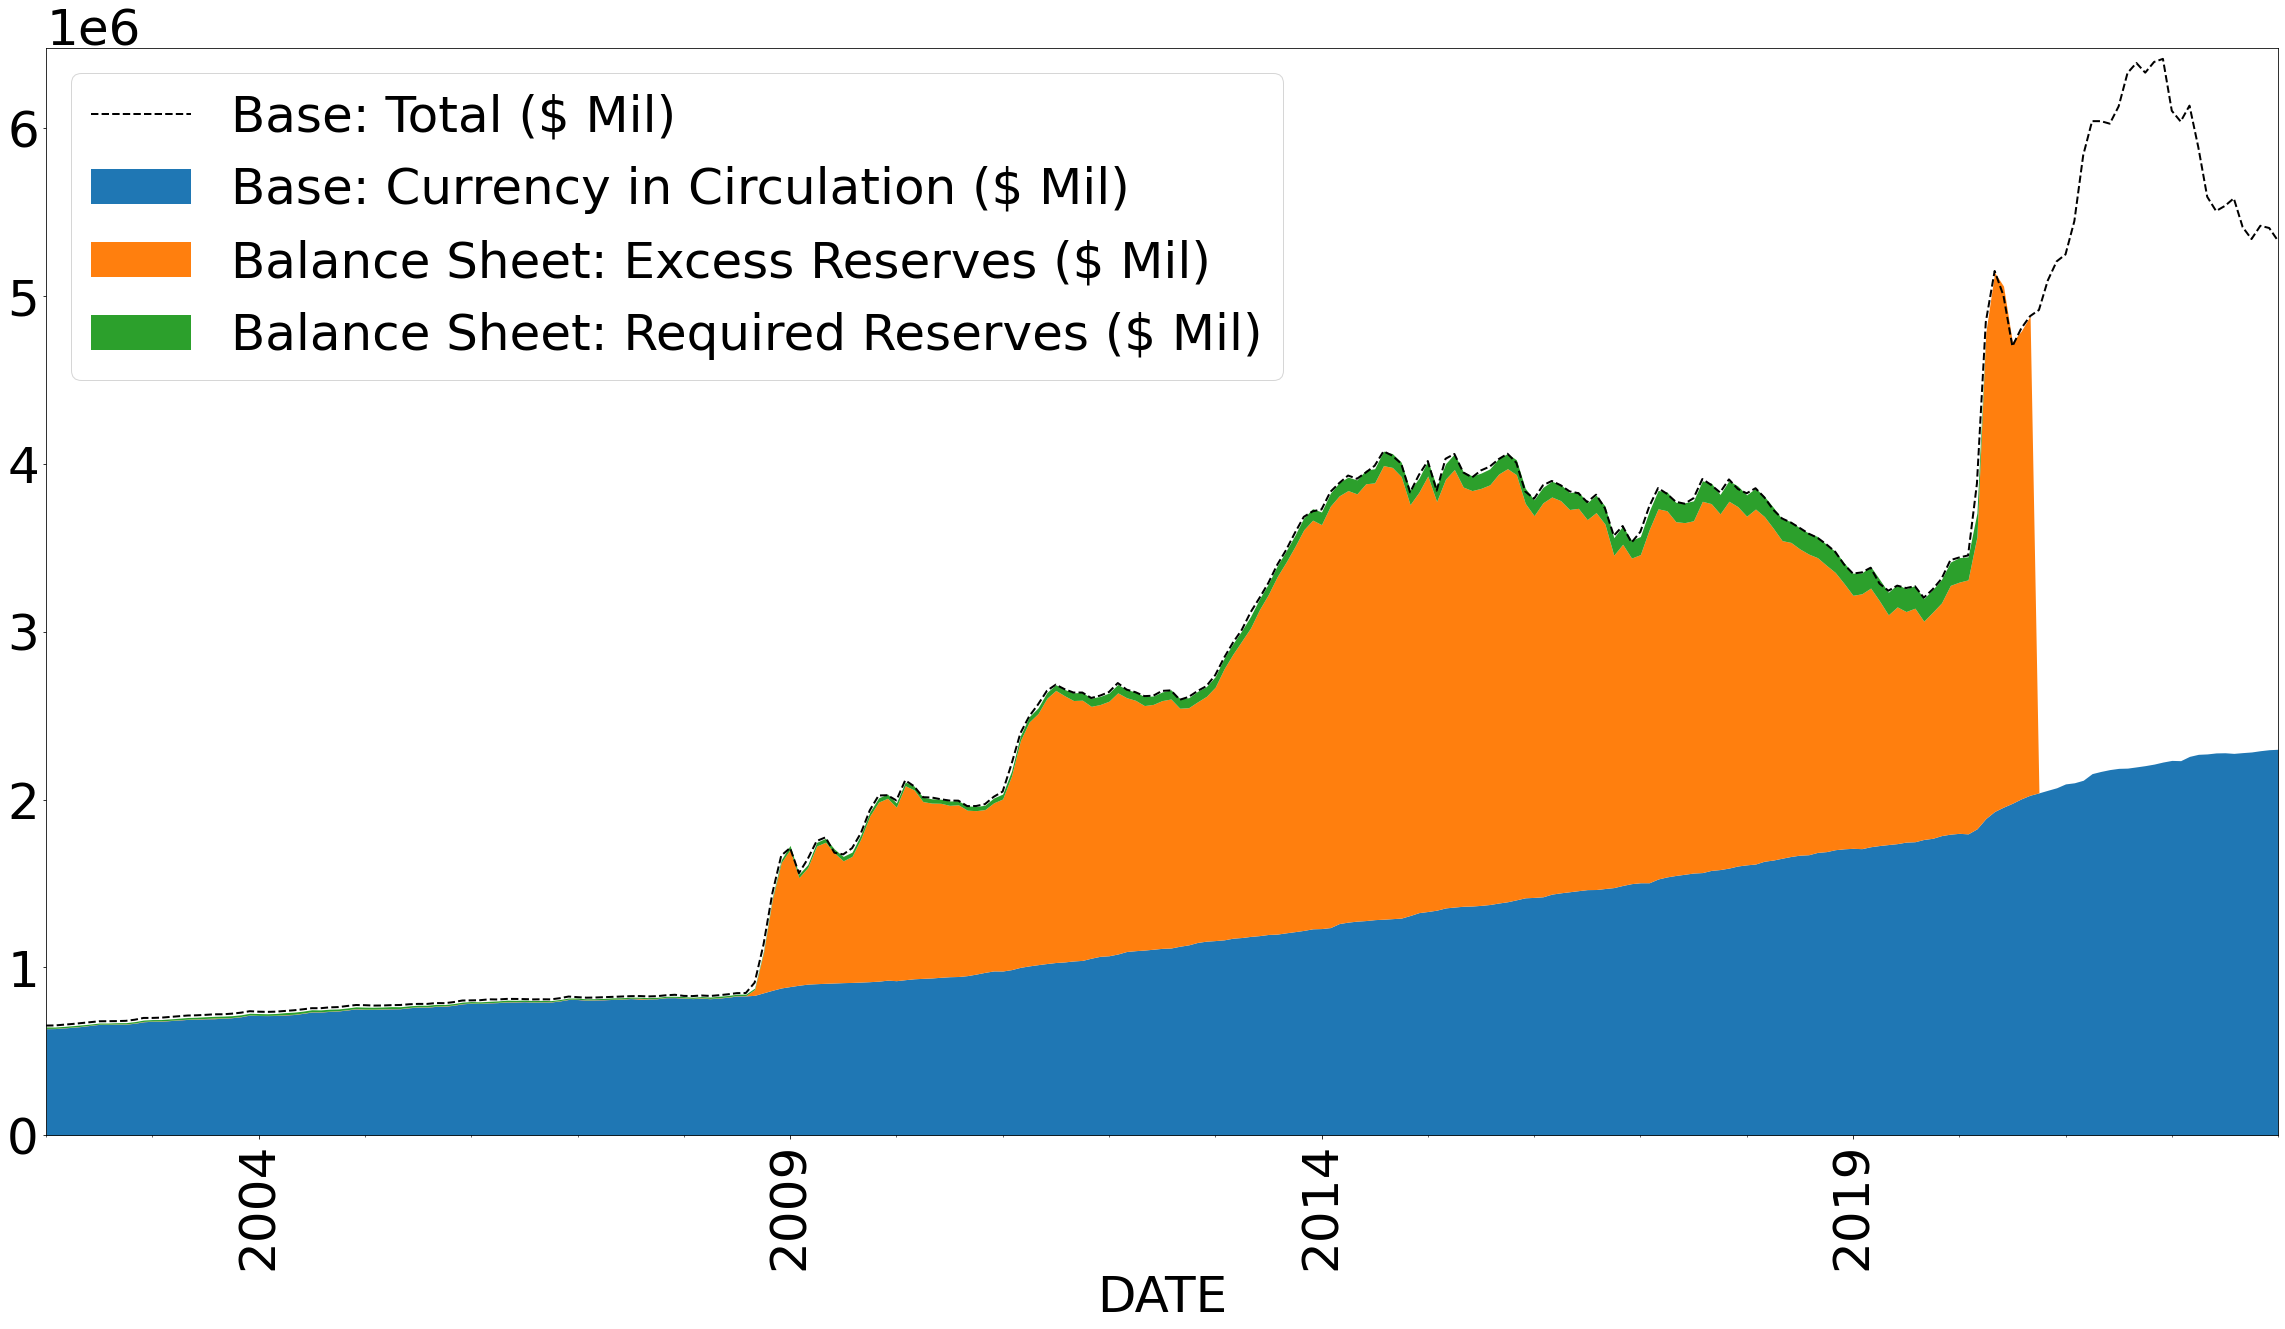

In [25]:
stack_vars = money_vars[1:]

fig, ax = plot_stacked(df = data,
                      stack_vars = stack_vars,
                      total_var = total_var)

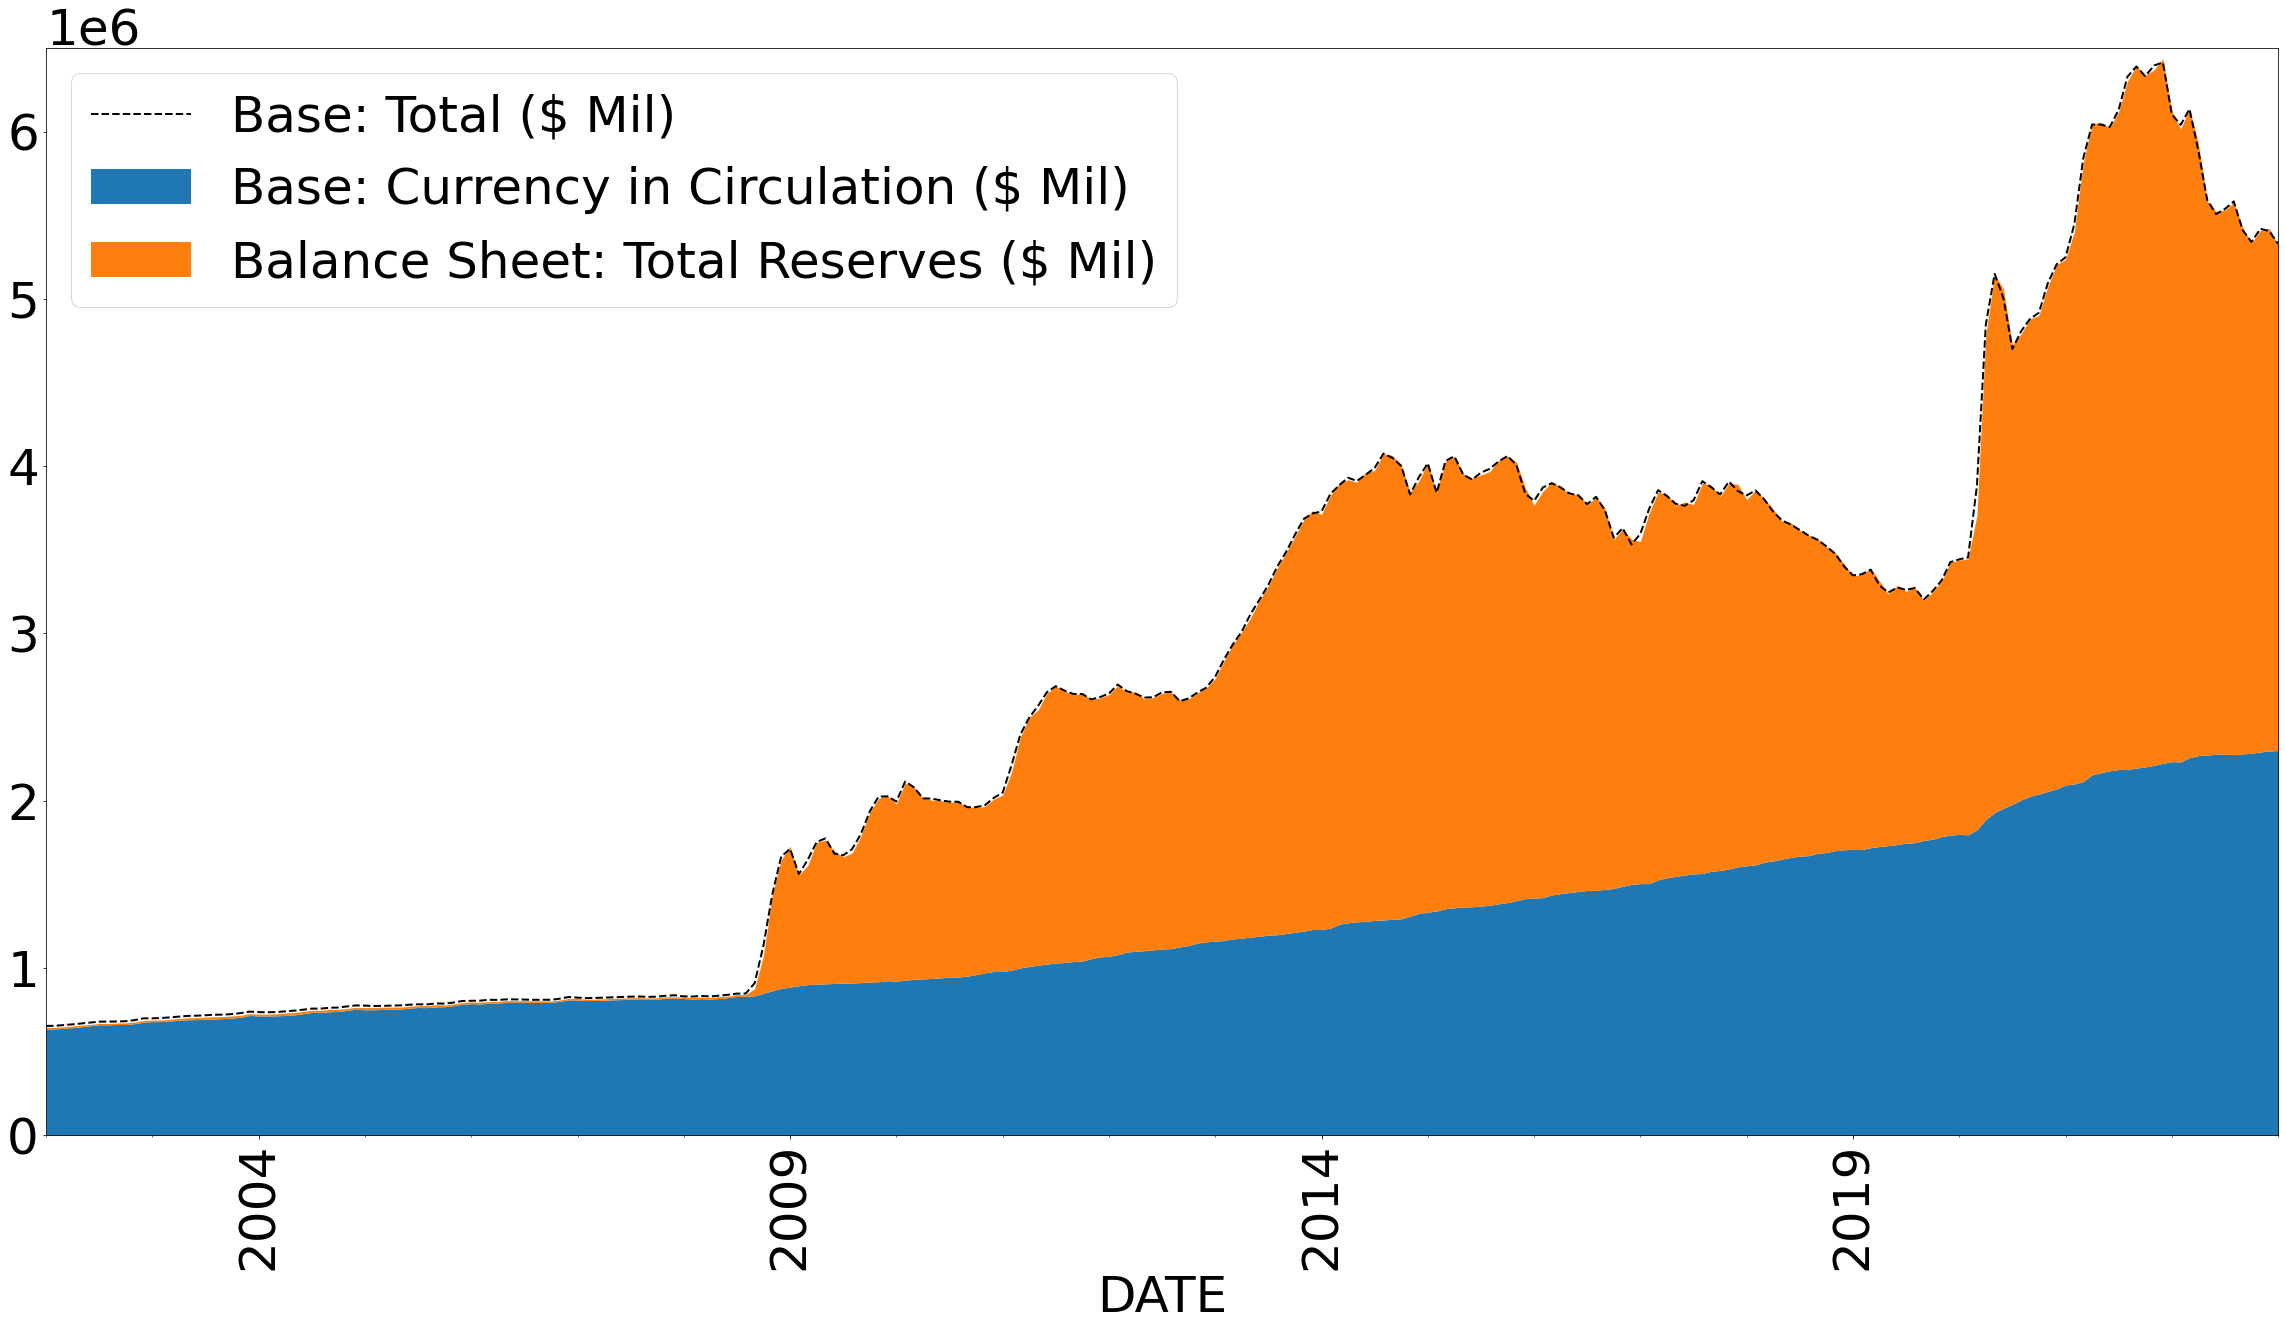

In [26]:
stack_vars = ["Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Total Reserves ($ Mil)"]
fig, ax = plot_stacked(df = data,
                      stack_vars = stack_vars,
                      total_var = total_var)

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


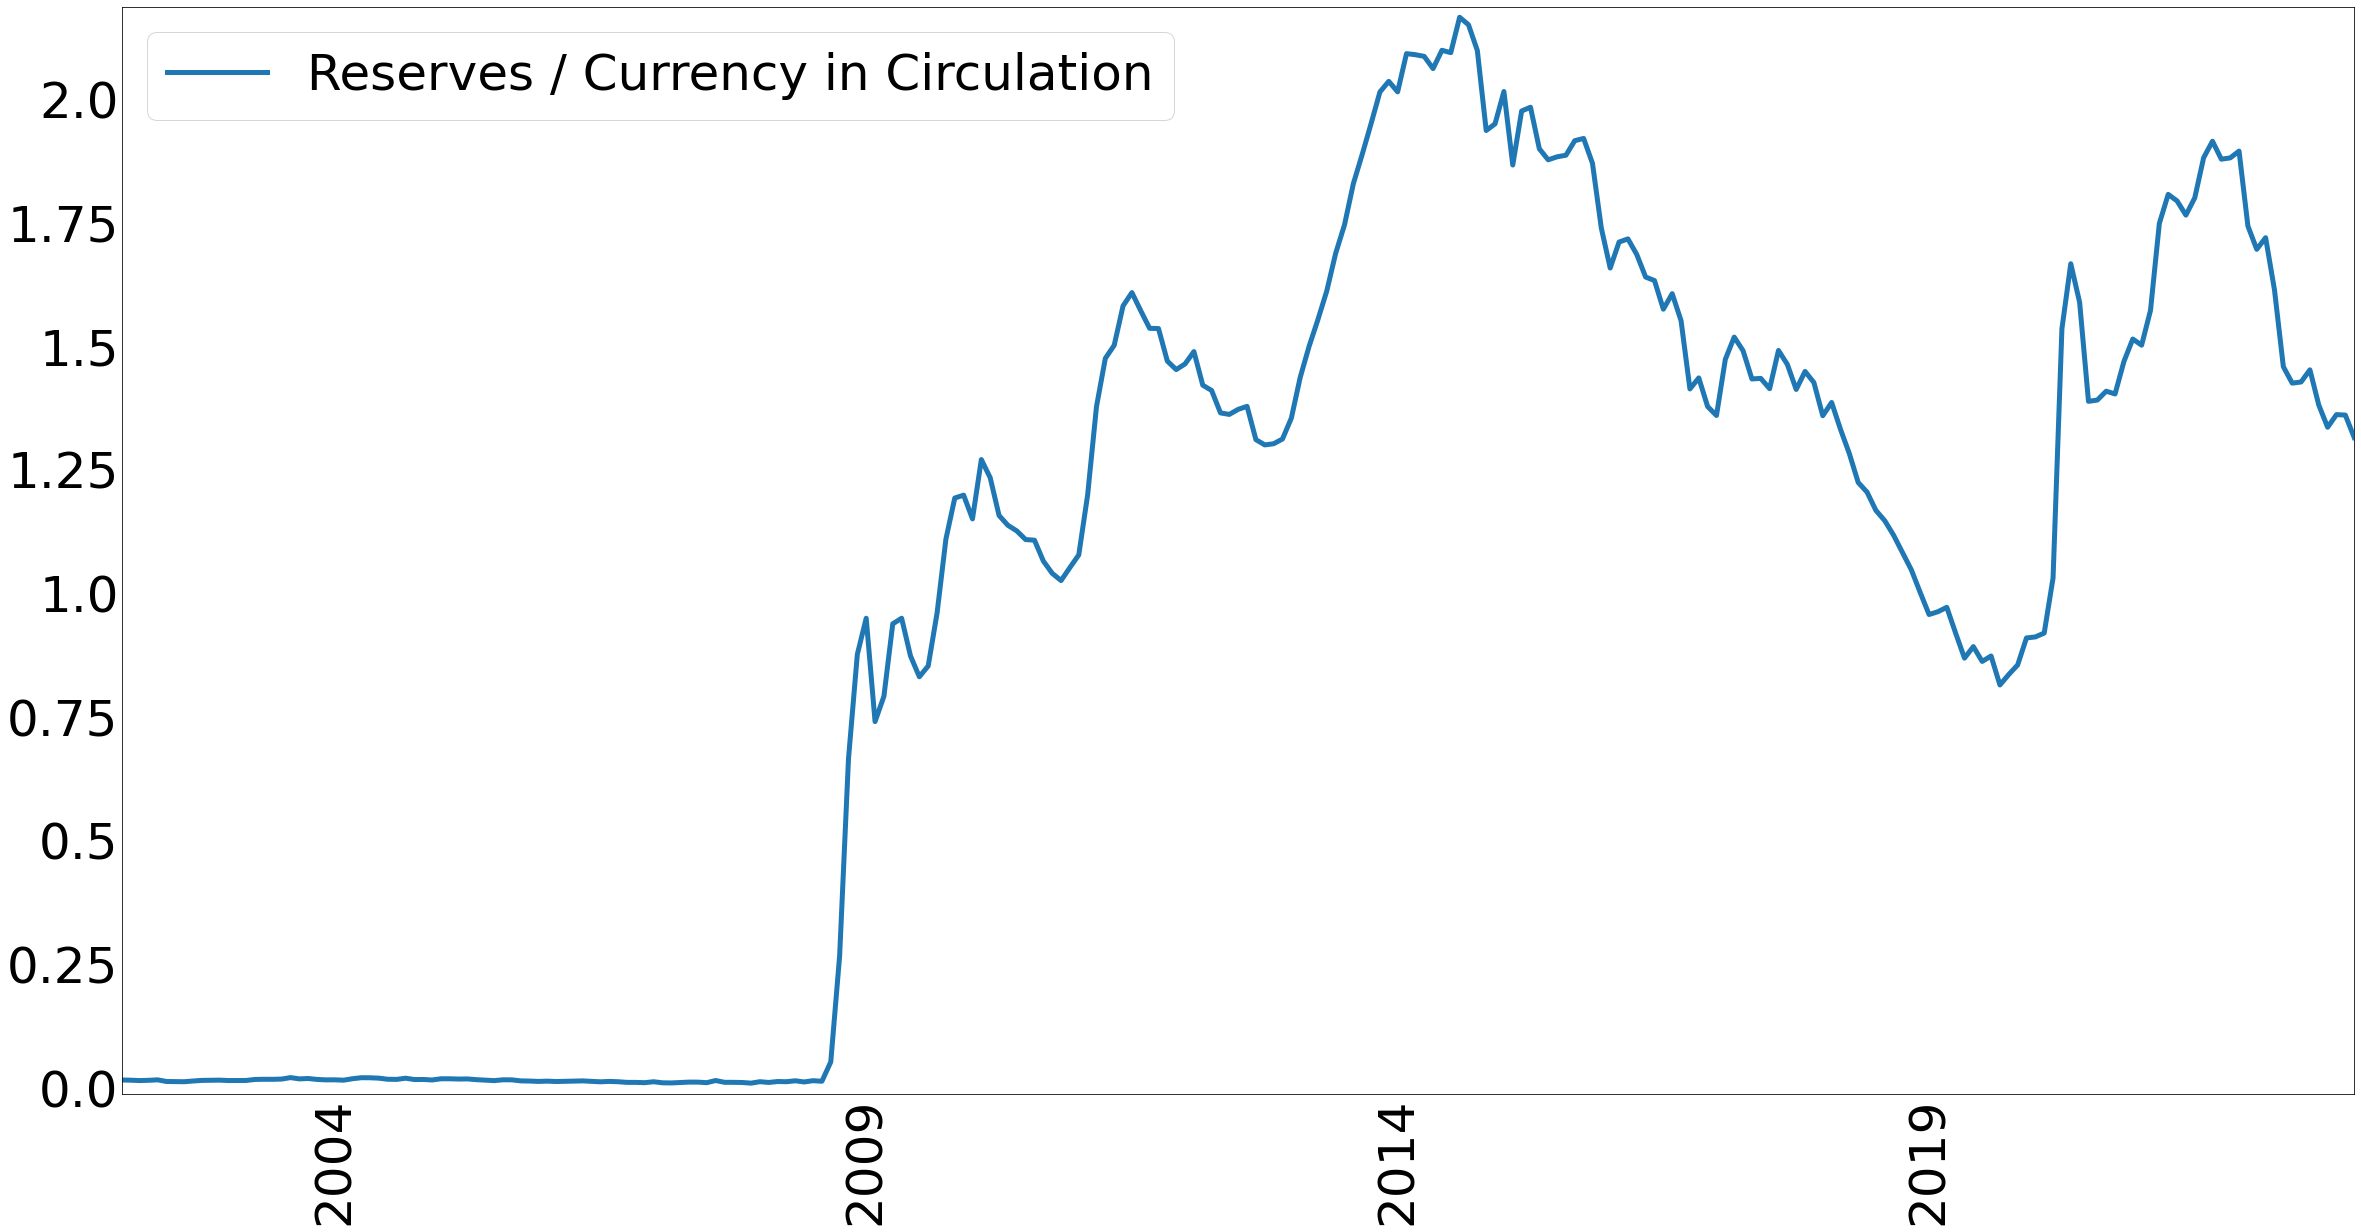

In [27]:
data["Reserves / Currency in Circulation"] = data["Balance Sheet: Total Reserves ($ Mil)"].div(
    data["Base: Currency in Circulation ($ Mil)"])
reserve_vars = ["Reserves / Currency in Circulation"]
plot_df = data[reserve_vars]
fig, ax = plot_lines(plot_df)

(<Figure size 2880x1440 with 1 Axes>, <AxesSubplot:xlabel='DATE'>)

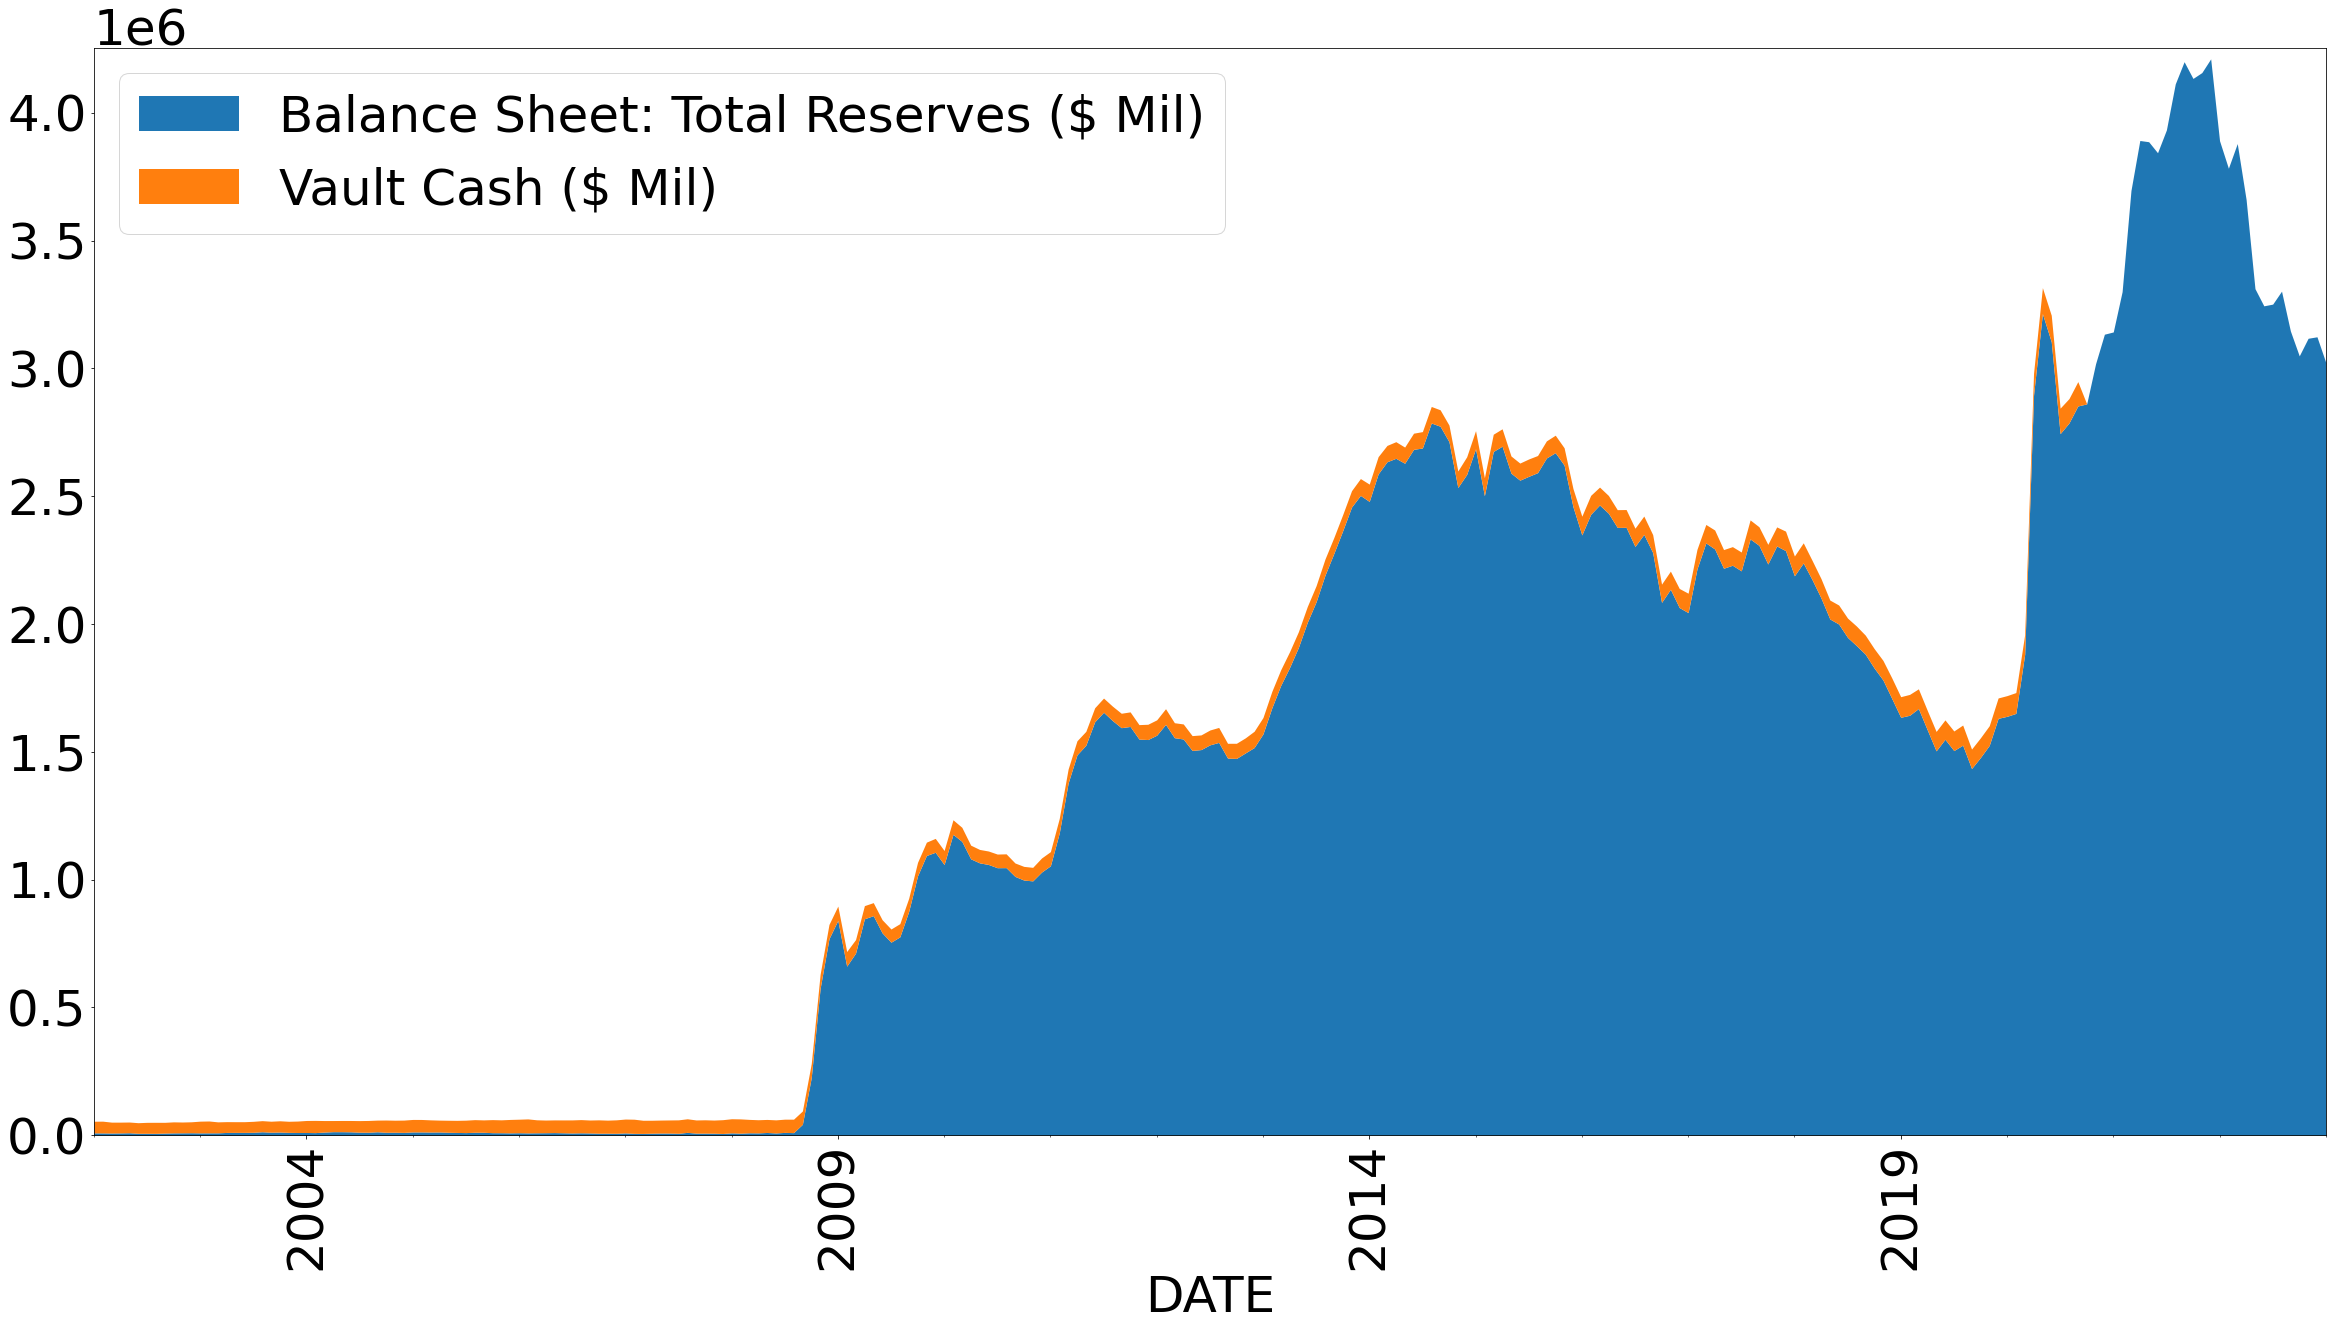

In [28]:
reserve_vars = ["Balance Sheet: Total Reserves ($ Mil)",
               "Vault Cash ($ Mil)"]
plot_data = data[reserve_vars]
plot_stacked(plot_data, reserve_vars)

In [29]:
plot_data

,Balance Sheet: Total Reserves ($ Mil),Vault Cash ($ Mil)
DATE,,
2002-01-31,9613.80,45416.20
2002-02-28,9355.75,45947.00
2002-03-31,8920.50,42567.25
2002-04-30,9339.75,42146.25
2002-05-31,10013.00,41926.20
...,...,...
2022-09-30,3146264.00,NaN
2022-10-31,3048917.00,NaN
2022-11-30,3117723.40,NaN


## Assets

In [30]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
stack_vars = account_vars[1:]
total_var = account_vars[0]
plot_data = data[account_vars].dropna()
plot_data

,Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil)
DATE,,,,
2002-12-31,629409.50,629399.50,10.0,0.00
2003-01-31,629416.00,629406.00,10.0,0.00
2003-02-28,631911.75,631901.75,10.0,0.00
2003-03-31,639168.25,639158.25,10.0,0.00
2003-04-30,645508.60,645498.60,10.0,0.00
...,...,...,...,...
2022-09-30,8393452.25,5680889.50,2347.0,2710215.50
2022-10-31,8316832.75,5621114.50,2347.0,2693371.50
2022-11-30,8222611.80,5547311.00,2347.0,2672953.40


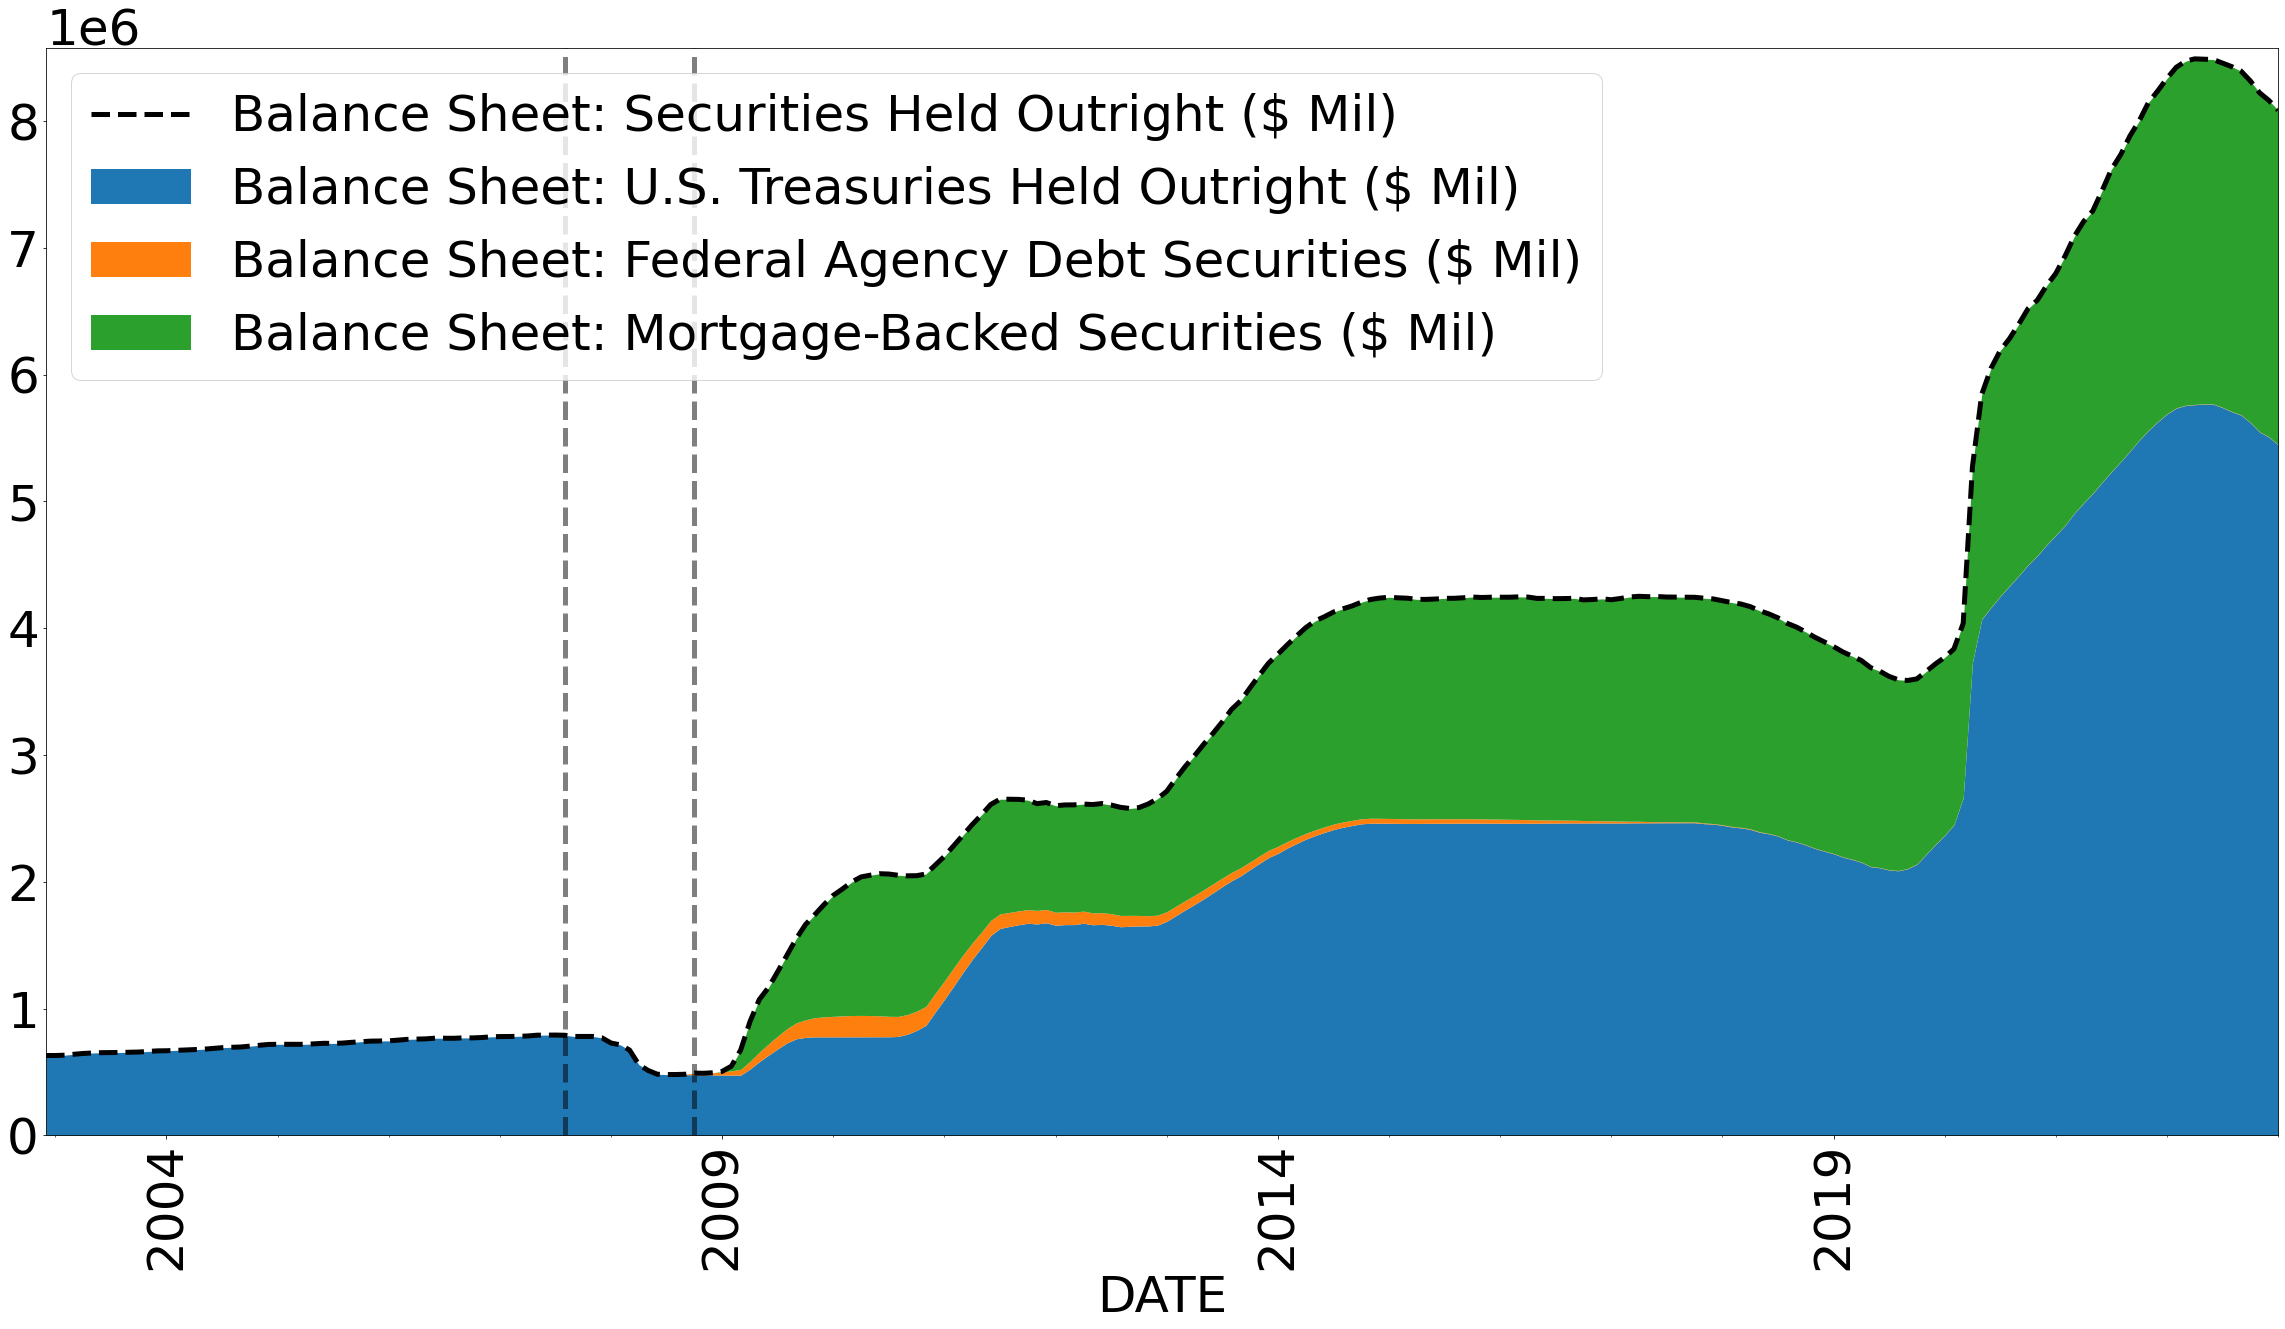

In [31]:
fig, ax = plot_stacked(df = plot_data, 
                       linewidth = 5,
                       stack_vars = stack_vars, 
                       total_var = total_var)
ax.axvline("2007-08-01", ls = "--", color = "k", linewidth = 5, alpha = 0.5)
ax.axvline("2008-10-01", ls = "--", color = "k", linewidth = 5, alpha = 0.5)

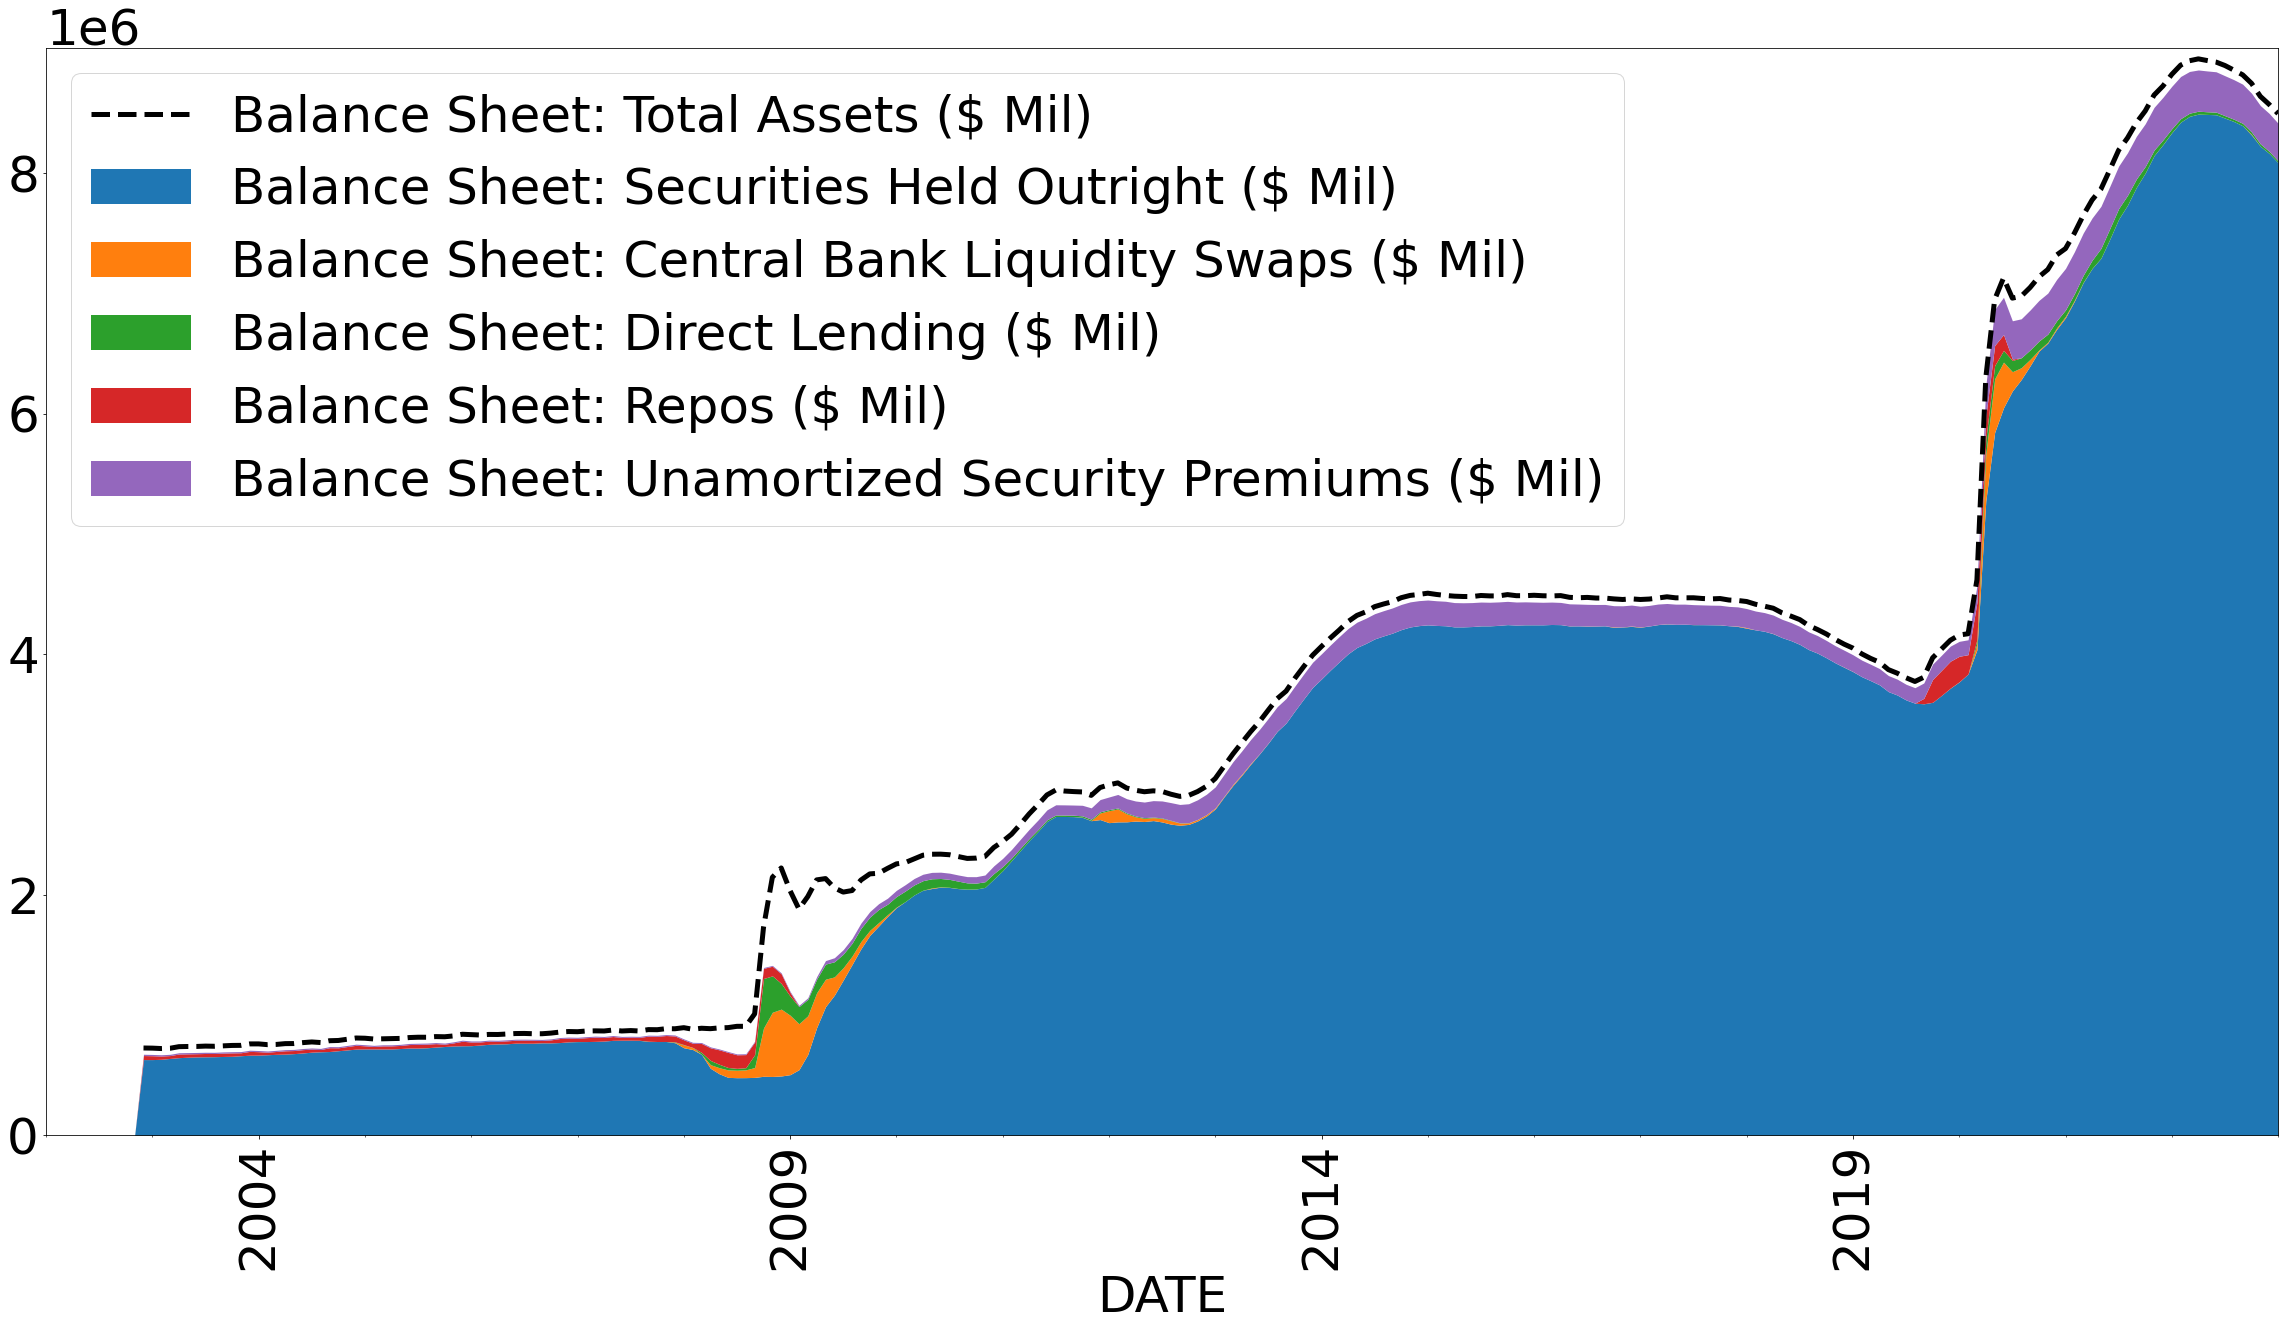

In [32]:
## from securities to remaining assets
account_vars = ["Balance Sheet: Total Assets ($ Mil)",
               "Balance Sheet: Securities Held Outright ($ Mil)",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
               "Balance Sheet: Direct Lending ($ Mil)",
               "Balance Sheet: Repos ($ Mil)",
               "Balance Sheet: Unamortized Security Premiums ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)


## Liabilities

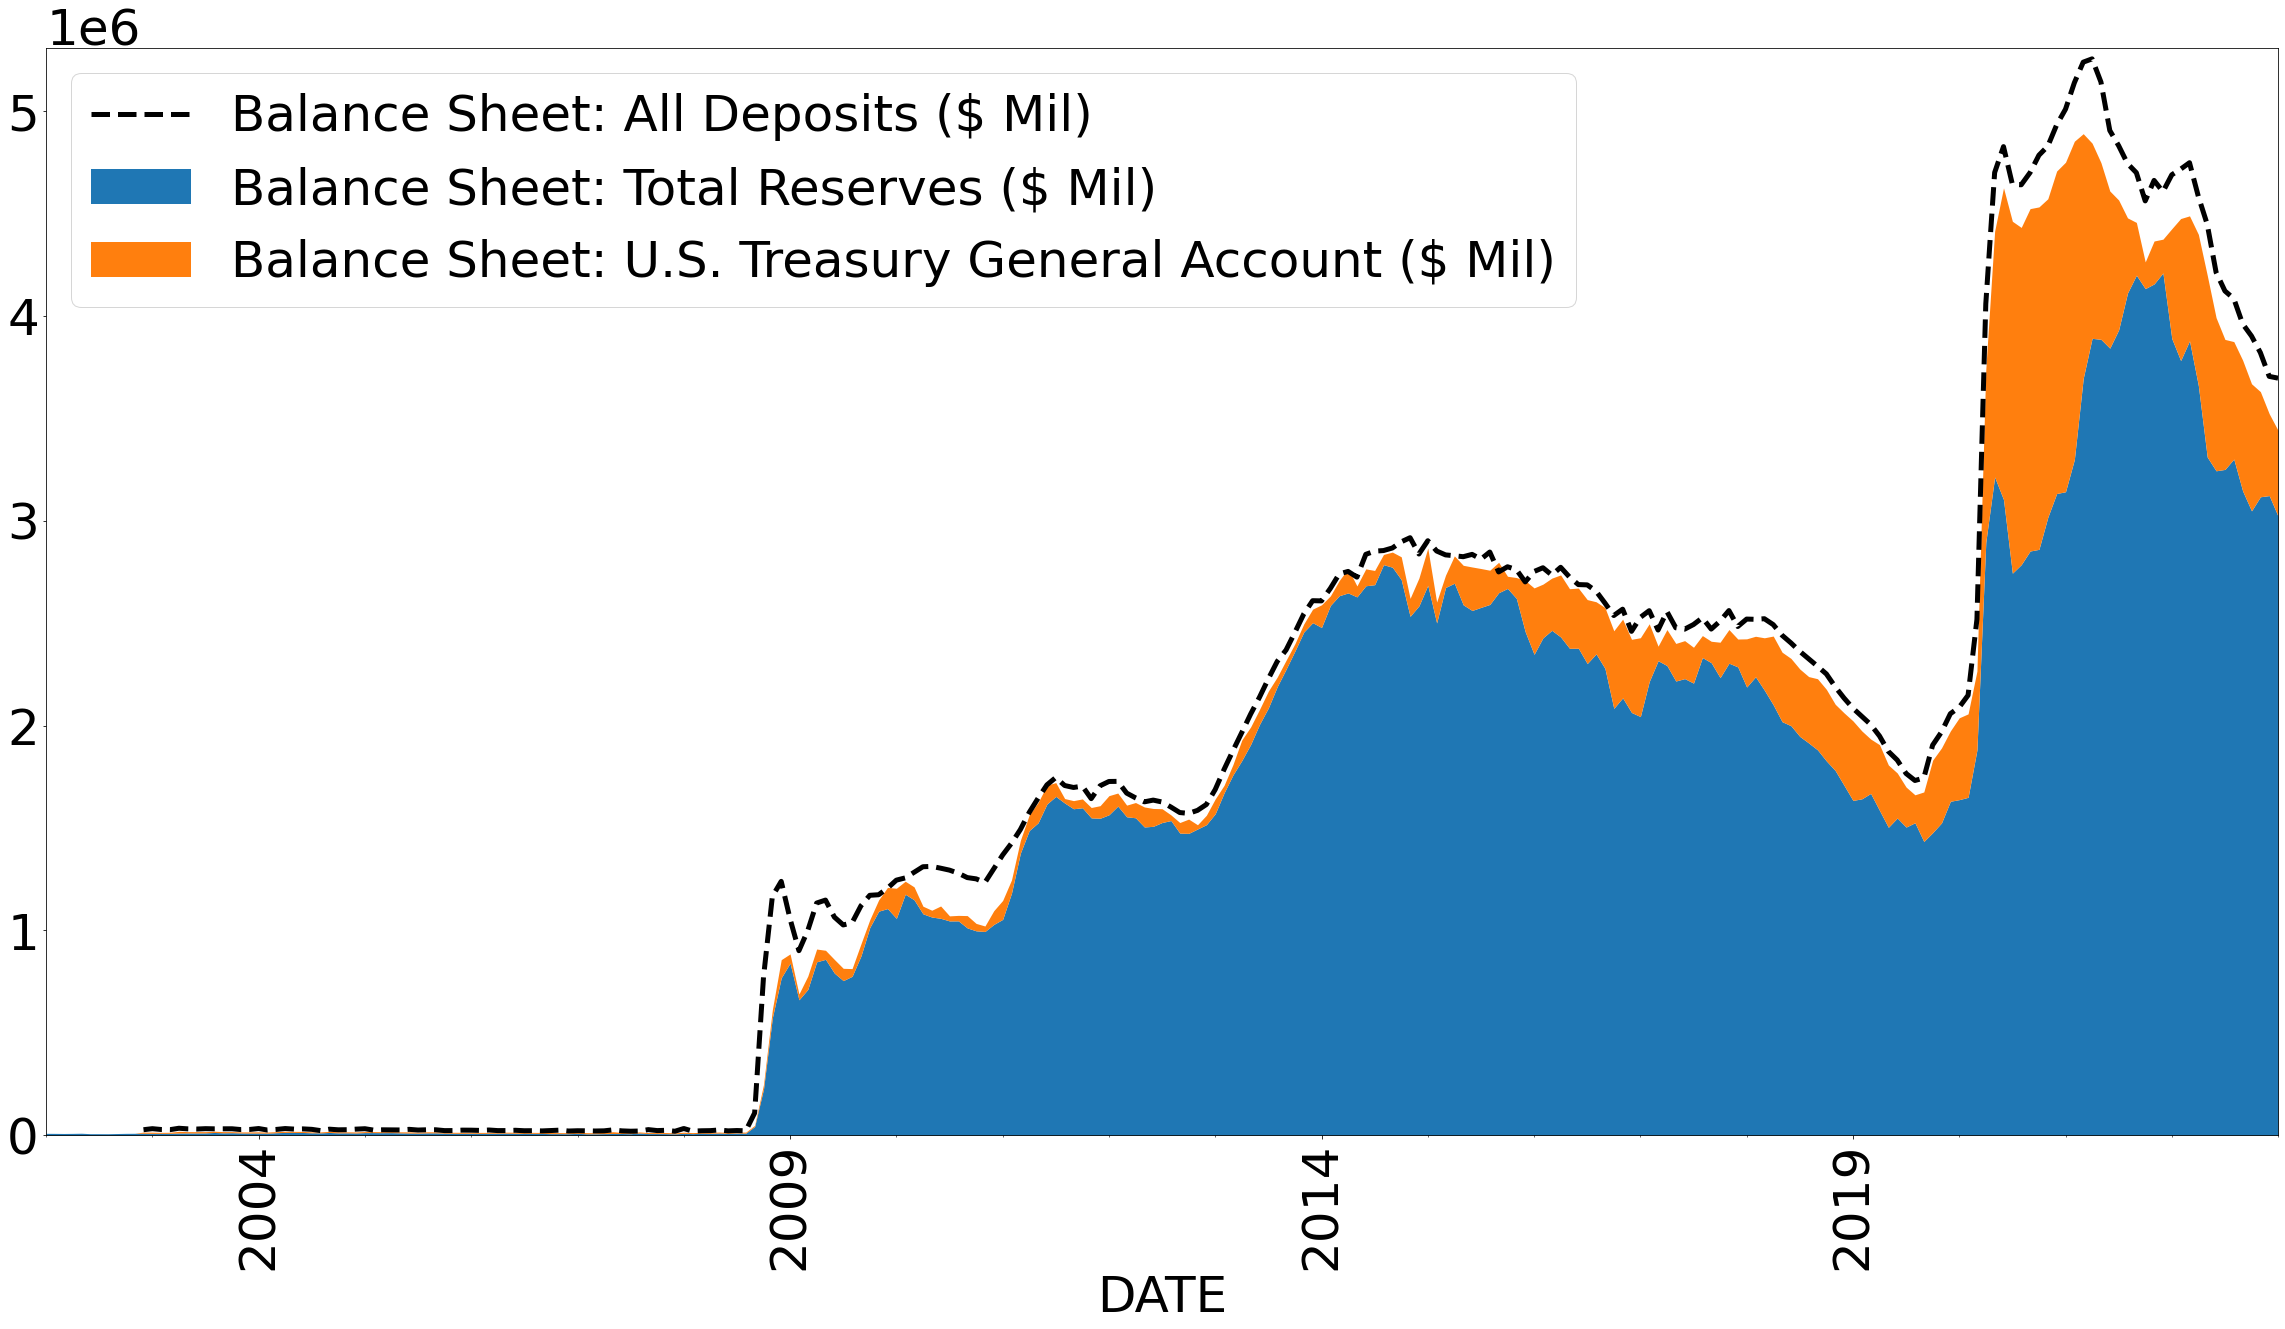

In [33]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

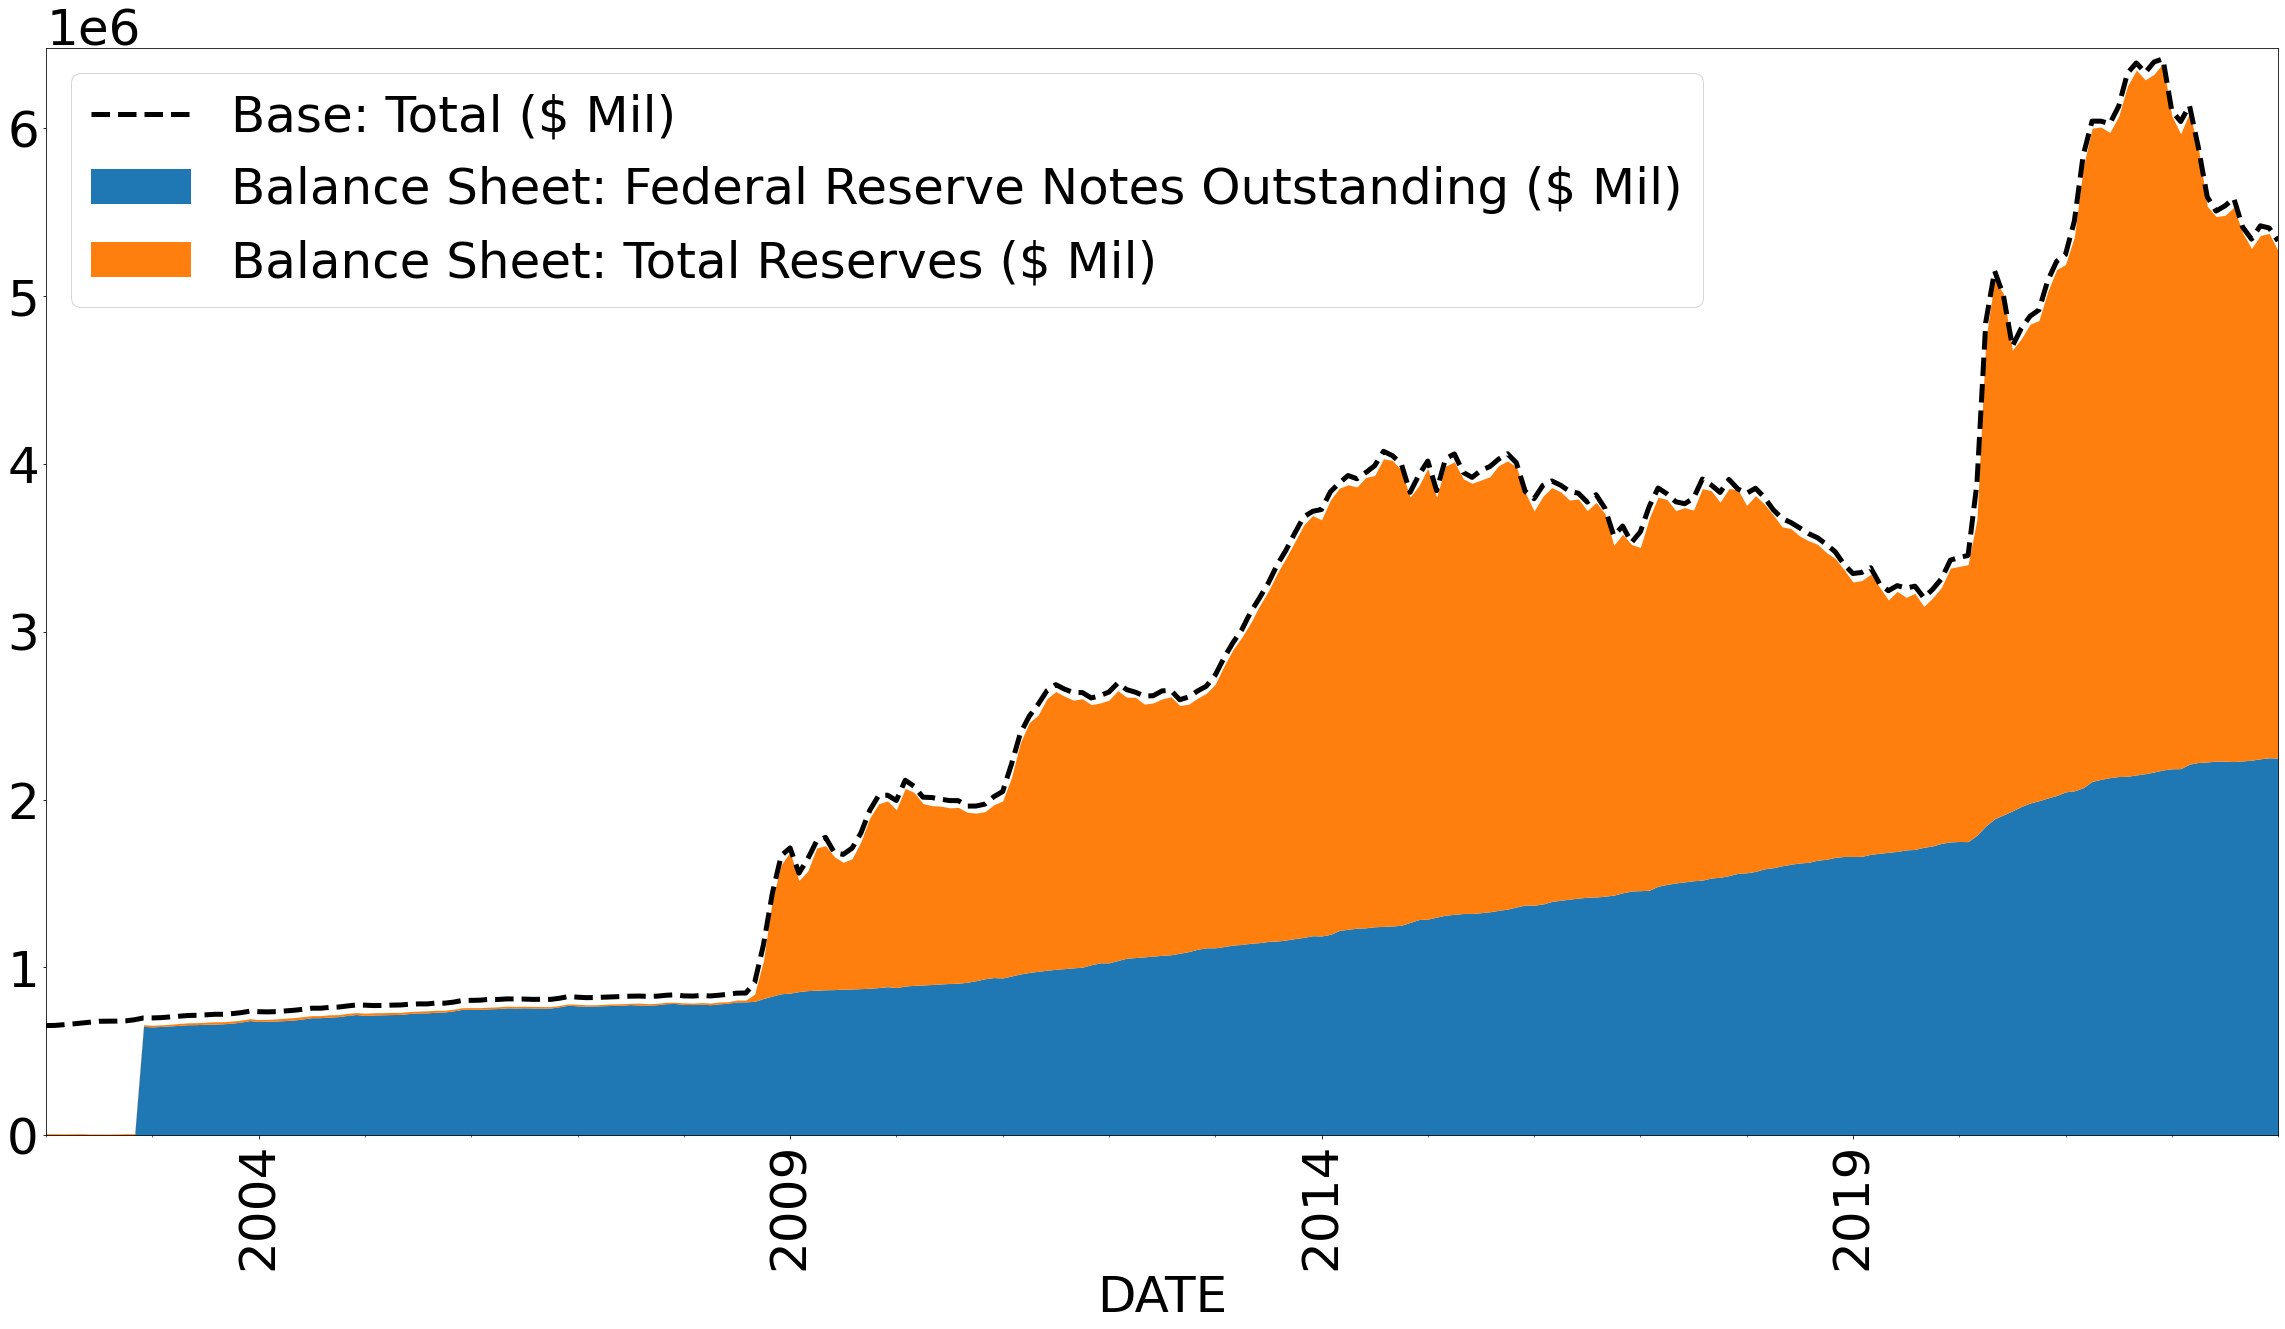

In [34]:
account_vars = ["Base: Total ($ Mil)",
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: Total Reserves ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

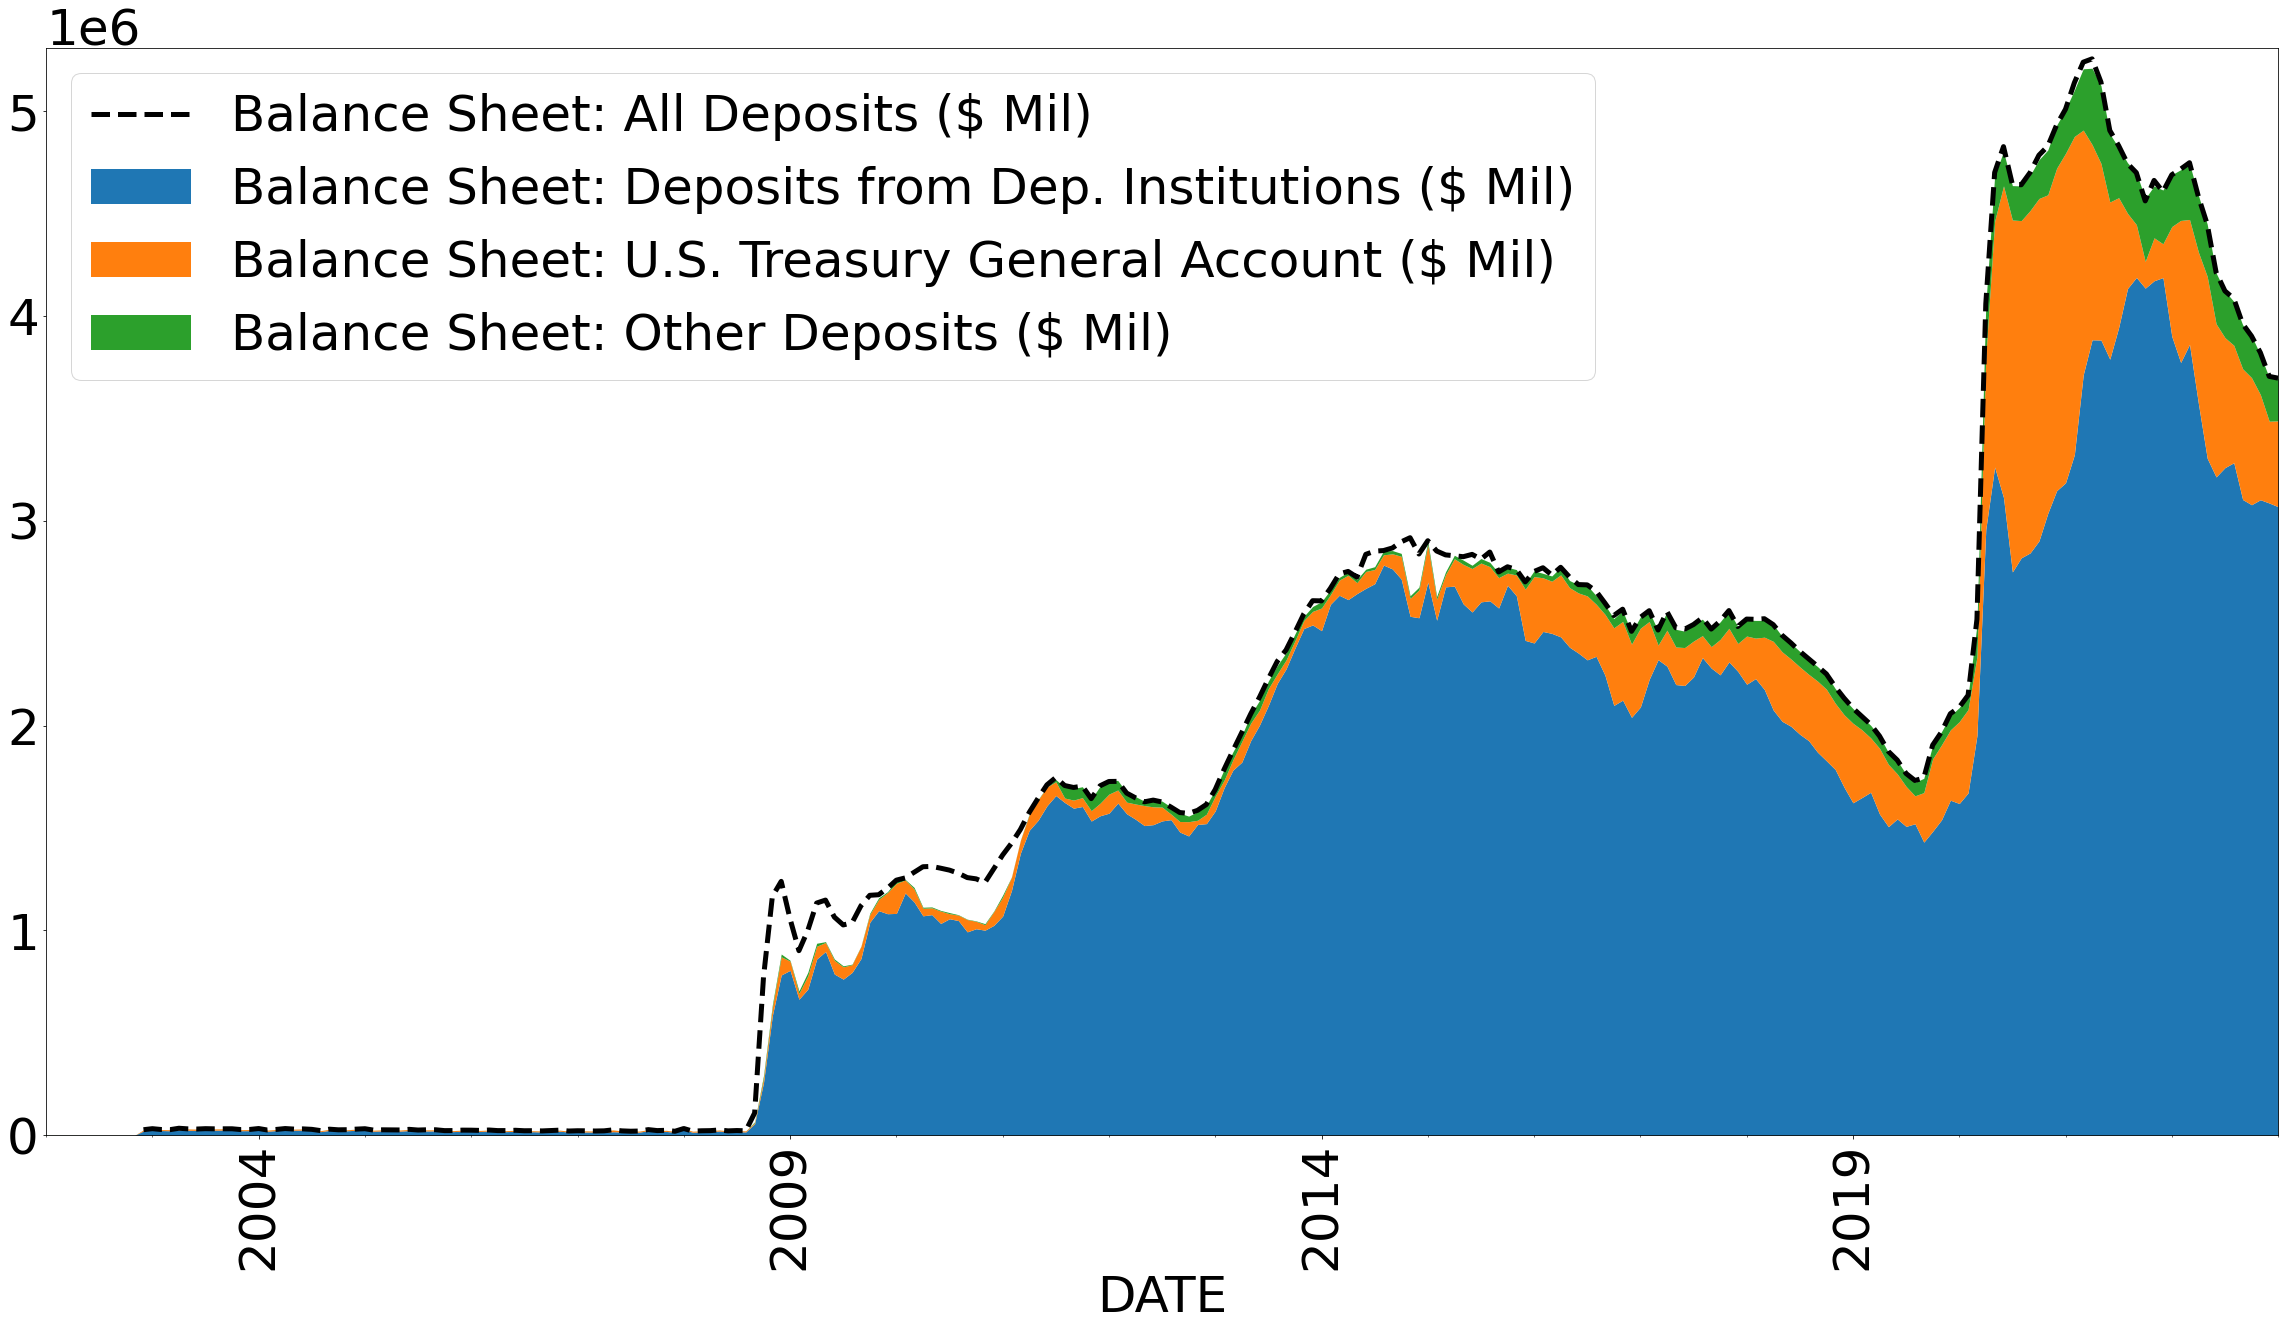

In [35]:
account_vars = ["Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Deposits from Dep. Institutions ($ Mil)",
                "Balance Sheet: U.S. Treasury General Account ($ Mil)",
                "Balance Sheet: Other Deposits ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

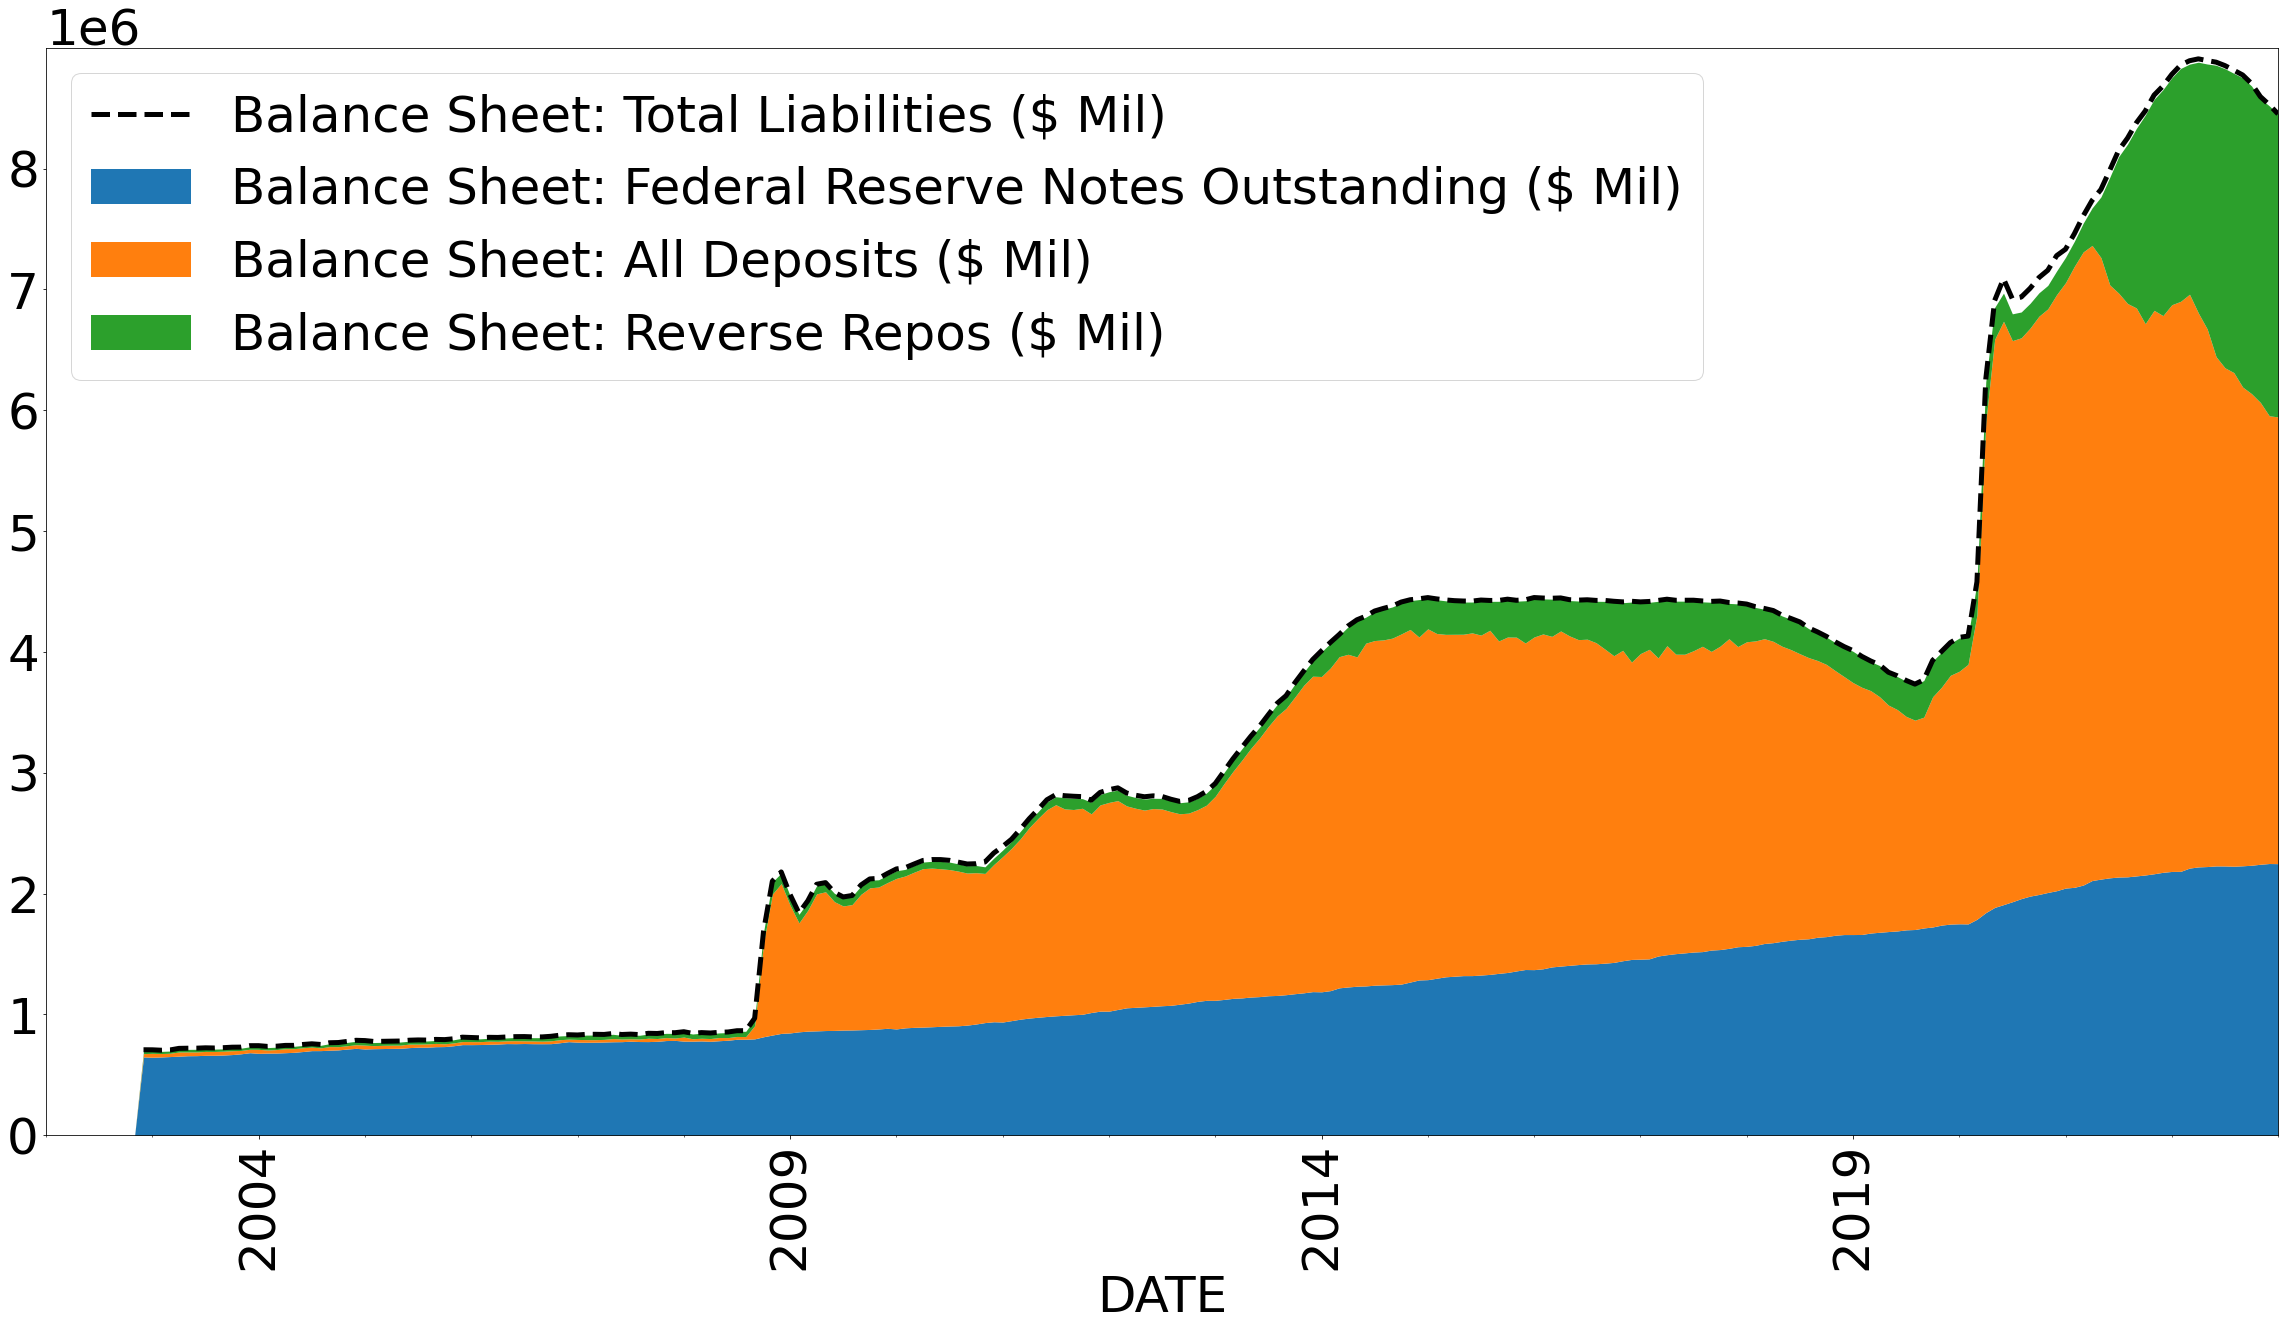

In [36]:
account_vars = ["Balance Sheet: Total Liabilities ($ Mil)",
                # Approx Circulating Currency
                "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                # Federal Reserve Borrowing
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_data = data[account_vars]
stack_vars = account_vars[1:]
total_var = account_vars[0]
fig, ax = plot_stacked(df = plot_data,
            linewidth = 5,
            stack_vars = stack_vars,
            total_var = total_var)

# Interbank / Overnight Lending Market

### Repo Operations

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


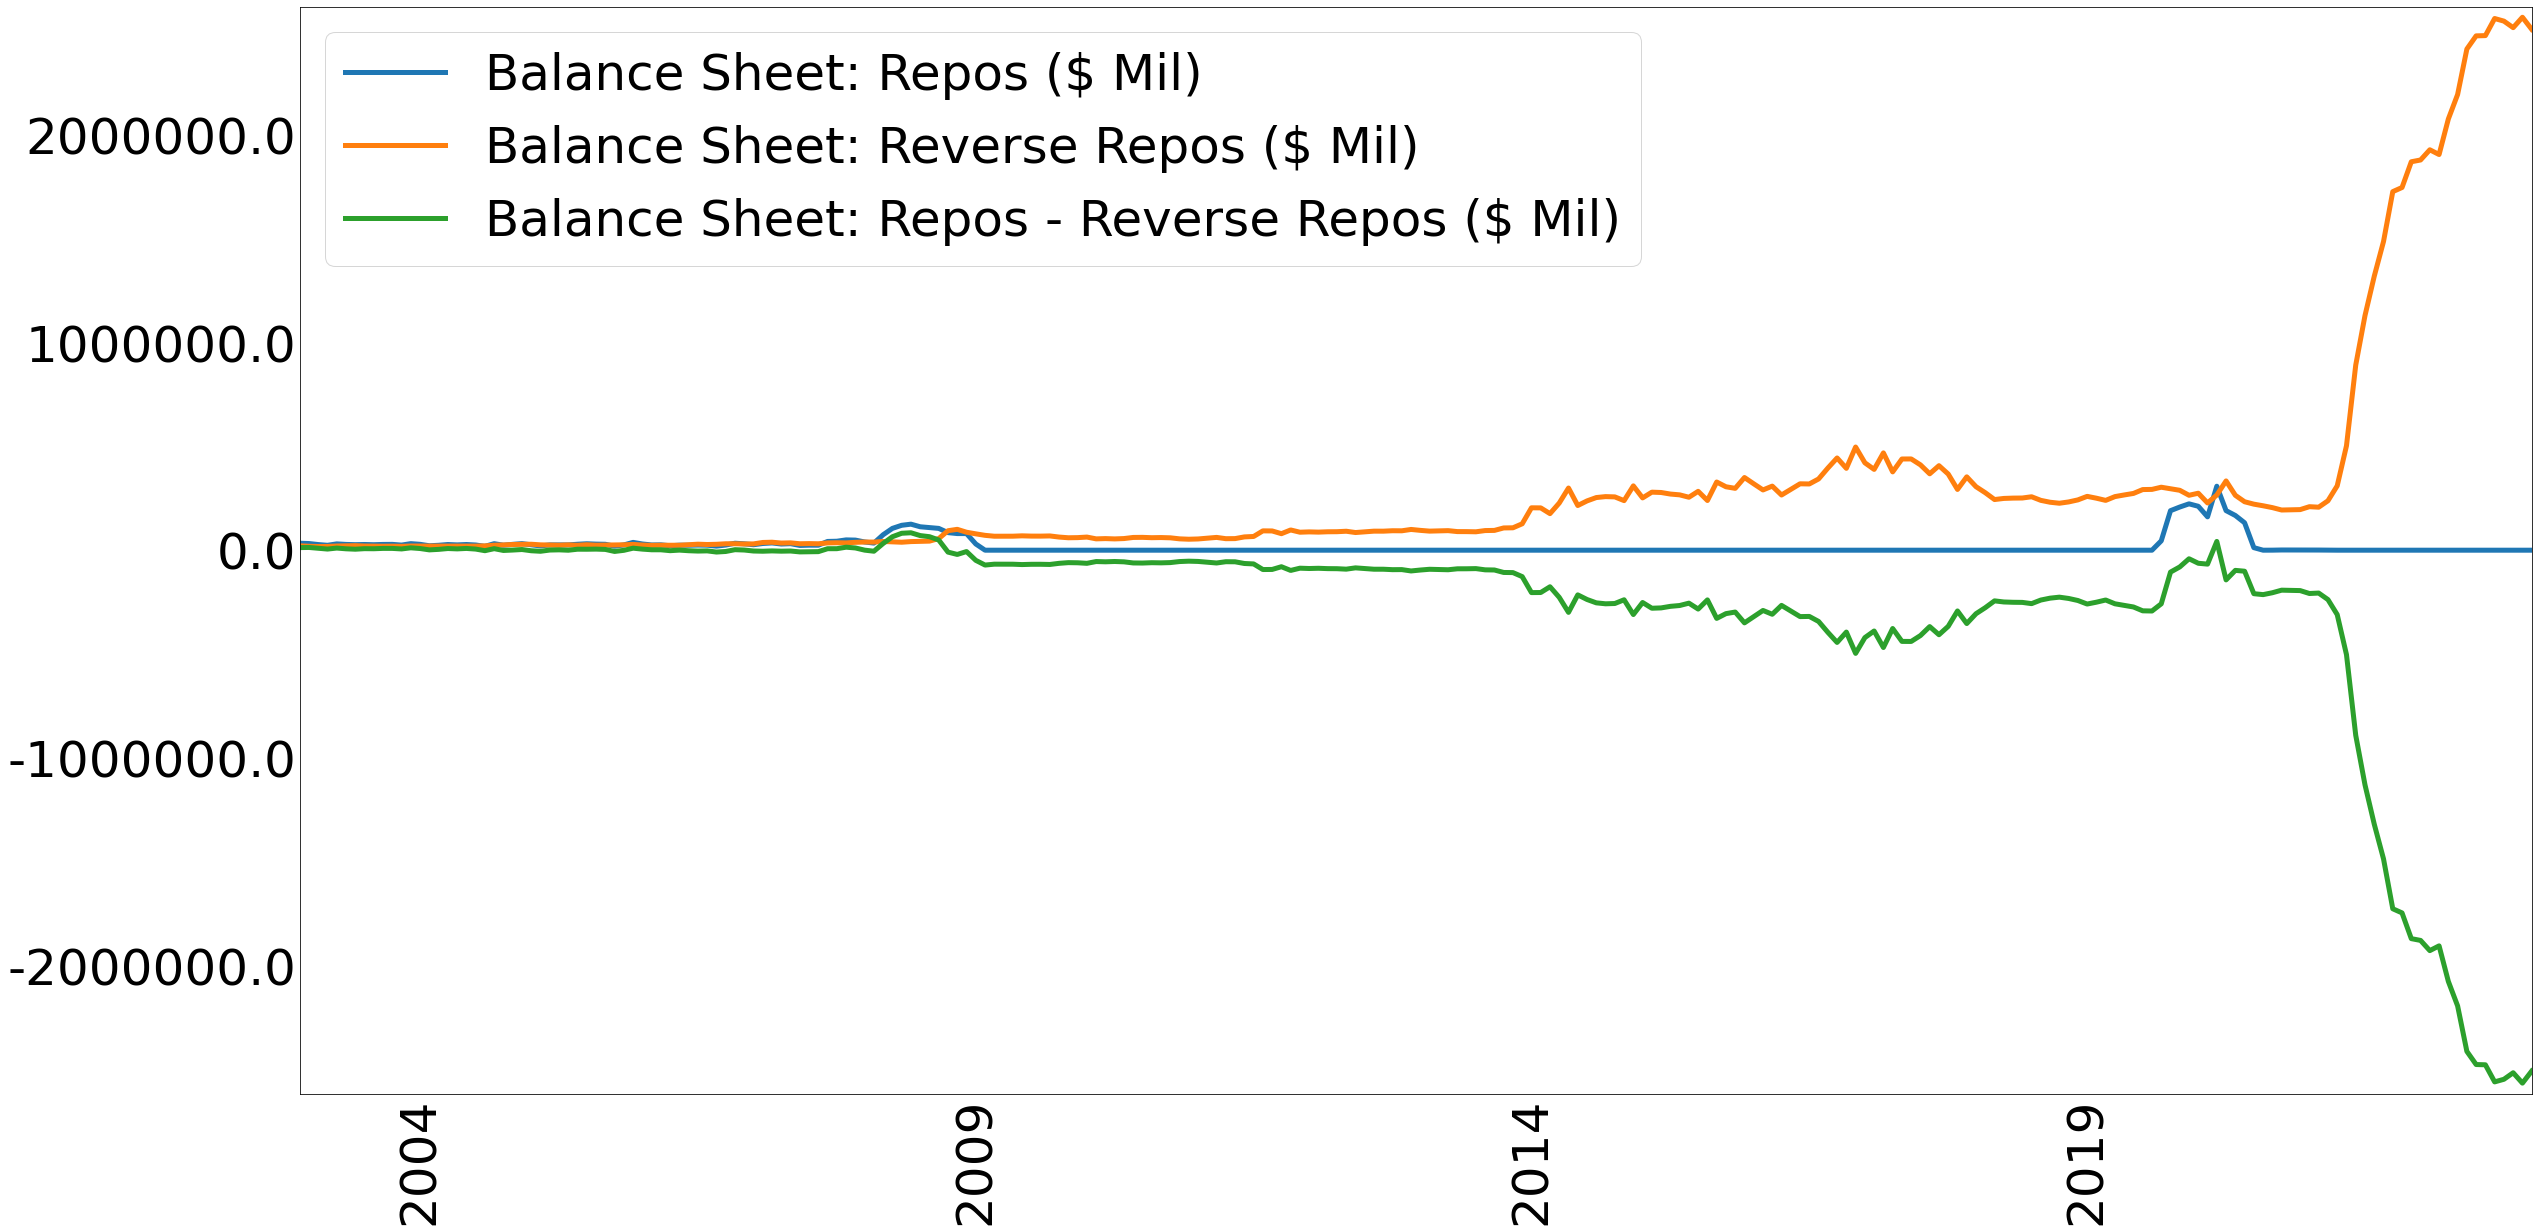

In [37]:
data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] =\
    data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                  "Balance Sheet: Reverse Repos ($ Mil)",
                  "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_data = data[overnight_vars].dropna()
fig, ax = plot_lines(plot_data)

### Federal Funds Rate

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_42963/2506096652.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


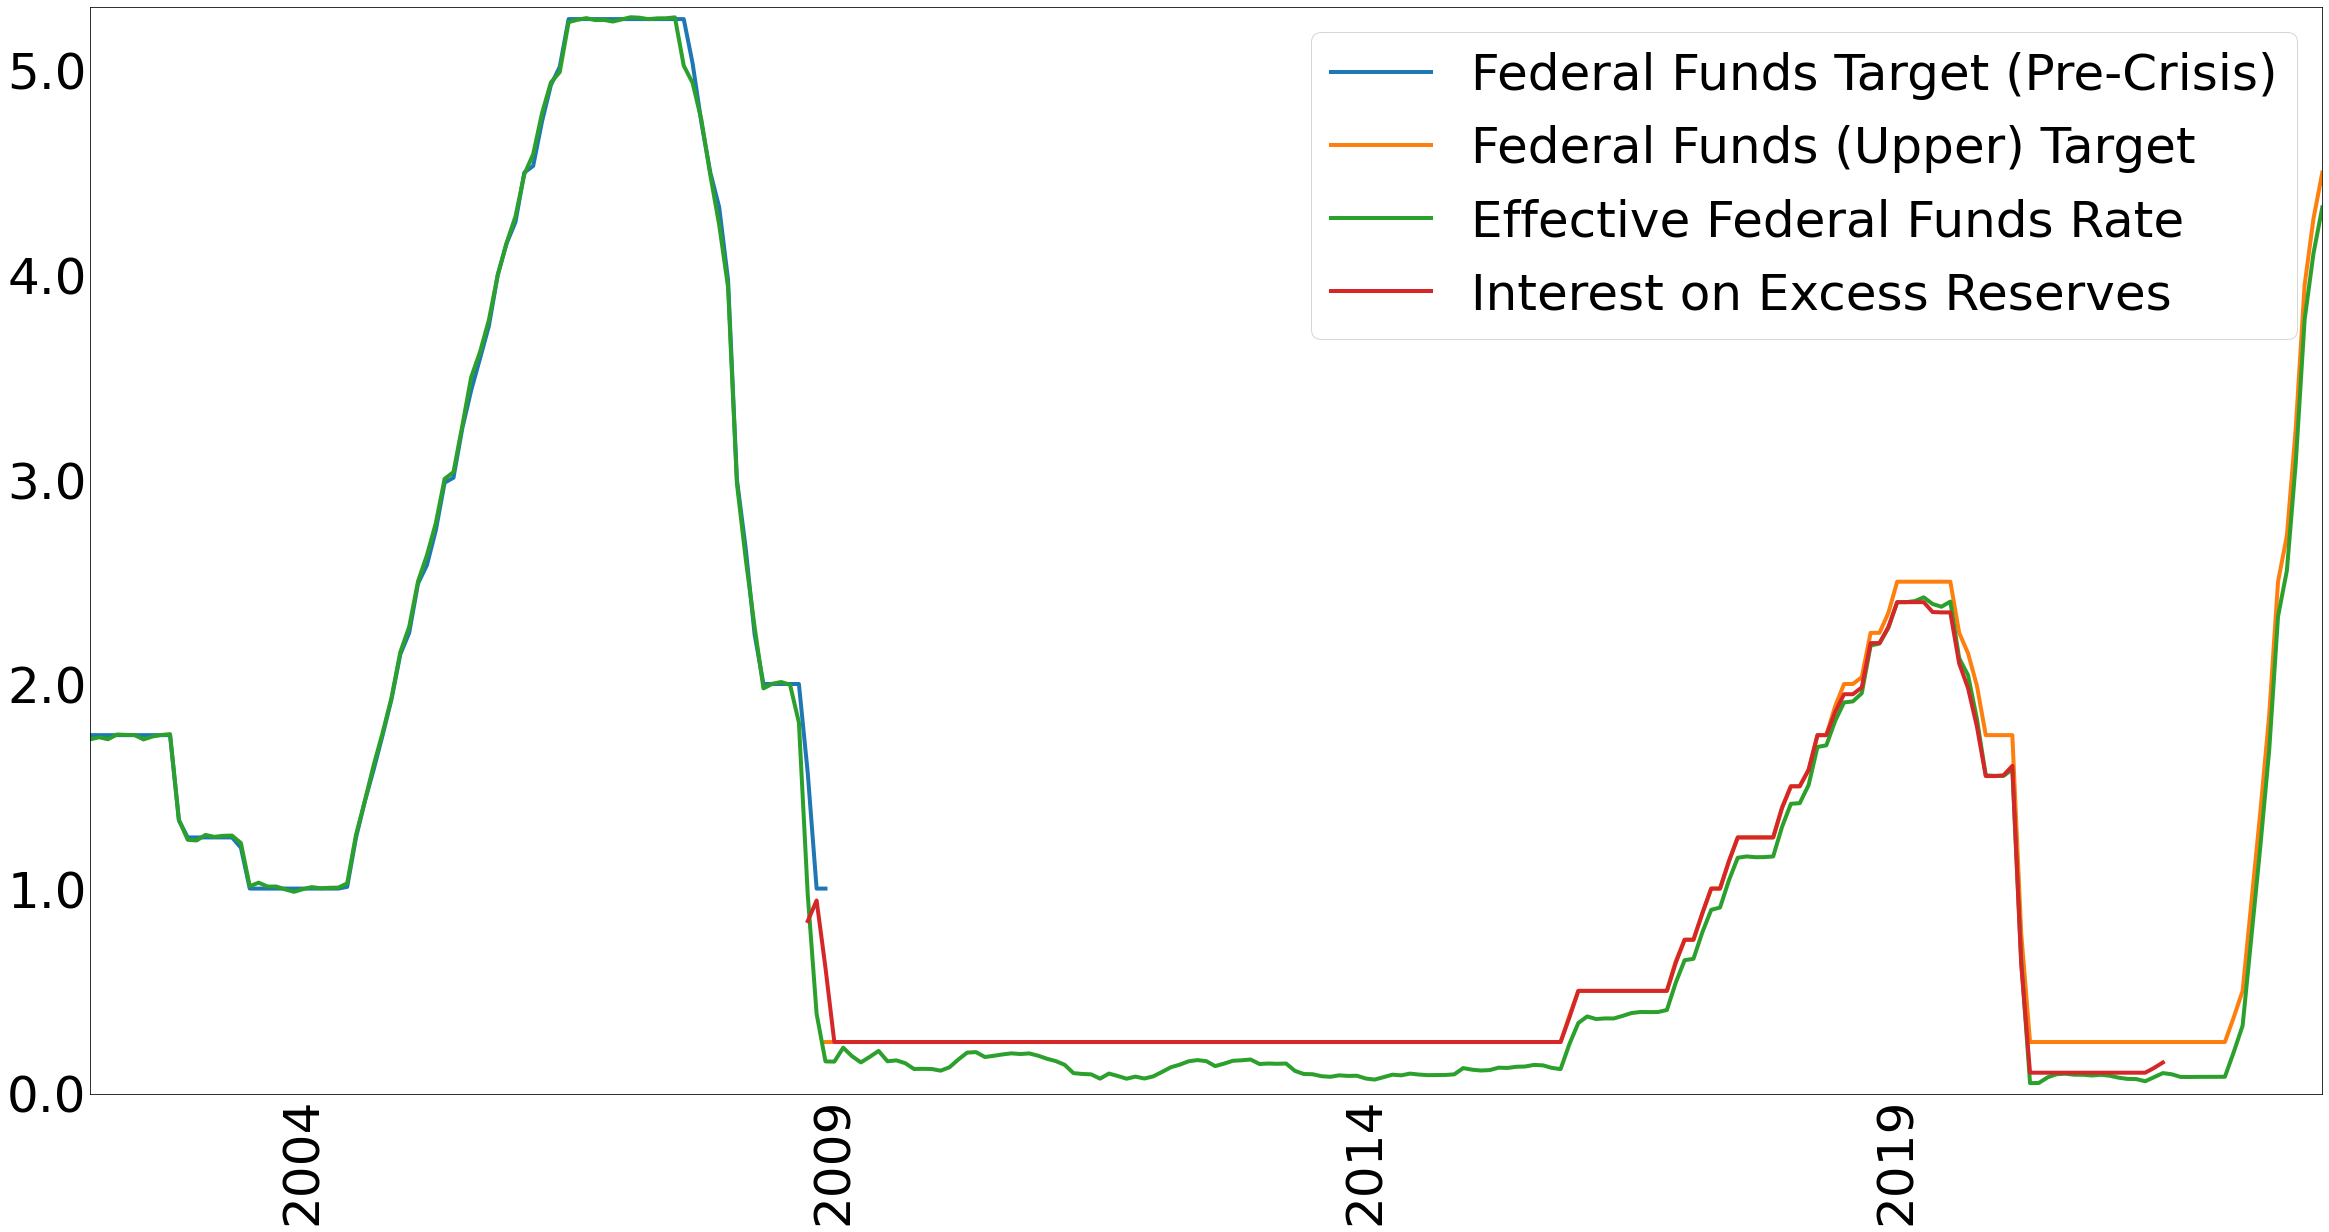

In [38]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                  "Federal Funds (Upper) Target",
                  "Effective Federal Funds Rate",
                  "Interest on Excess Reserves"]

plot_data = data[interest_vars]
fig, ax = plot_lines(data[interest_vars], linewidth = 4)